In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

In [ ]:
#Cargamos el dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_historical_and_individual_stats.csv')

In [ ]:
#Mostramos el dataset
dataset

,Ace,Double Fault,1st Serve,1st Serve Won,2nd Serve Won,Break Points Saved,Service Points Won,Service Games Won,Ace Against,Double Fault Against,1st Srv. Return Won,2nd Srv. Return Won,Break Points Won,Return Points Won,Return Games Won,Total Points Won,Games Won,Sets Won,Matches Won
0,0.0,2.6,70.3,60.0,50.9,41.2,57.3,66.7,6.3,2.4,26.5,58.0,28.6,40.0,21.4,48.4,58.0,70.7,76.4
1,2.1,3.0,65.1,62.8,50.1,57.8,58.4,70.3,8.2,4.0,32.2,53.0,41.9,40.6,29.4,49.6,59.7,75.6,81.7
2,0.0,3.3,53.3,56.3,21.4,53.3,40.0,22.2,2.2,0.0,40.0,70.0,100.0,46.7,37.5,42.9,53.6,59.4,63.7
3,0.0,0.0,70.8,41.2,50.0,25.0,43.8,33.3,0.0,4.5,36.7,58.8,37.5,42.4,33.3,43.0,51.4,55.0,56.6
4,5.3,2.6,61.2,65.6,42.4,55.0,56.6,62.5,5.2,0.6,26.9,43.4,41.7,35.1,19.2,45.8,47.2,43.4,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,0.0,3.7,61.1,48.5,61.9,42.9,53.7,55.6,0.0,0.0,39.0,47.1,16.7,40.8,11.1,46.2,33.3,0.0,0.0
2271,5.5,2.8,63.0,71.8,56.0,68.9,66.0,85.9,10.6,5.8,28.2,50.0,35.6,36.8,21.0,51.7,51.5,54.8,58.3
2272,4.3,3.1,63.8,67.1,45.2,60.6,59.1,67.5,14.1,3.0,26.2,51.5,34.8,35.7,20.0,47.3,43.8,37.5,33.3
2273,11.7,2.3,64.8,81.9,57.8,100.0,73.4,100.0,7.0,2.8,20.2,50.8,20.0,32.9,9.5,52.0,55.8,50.0,50.0


## Análisis de los datos que tenemos

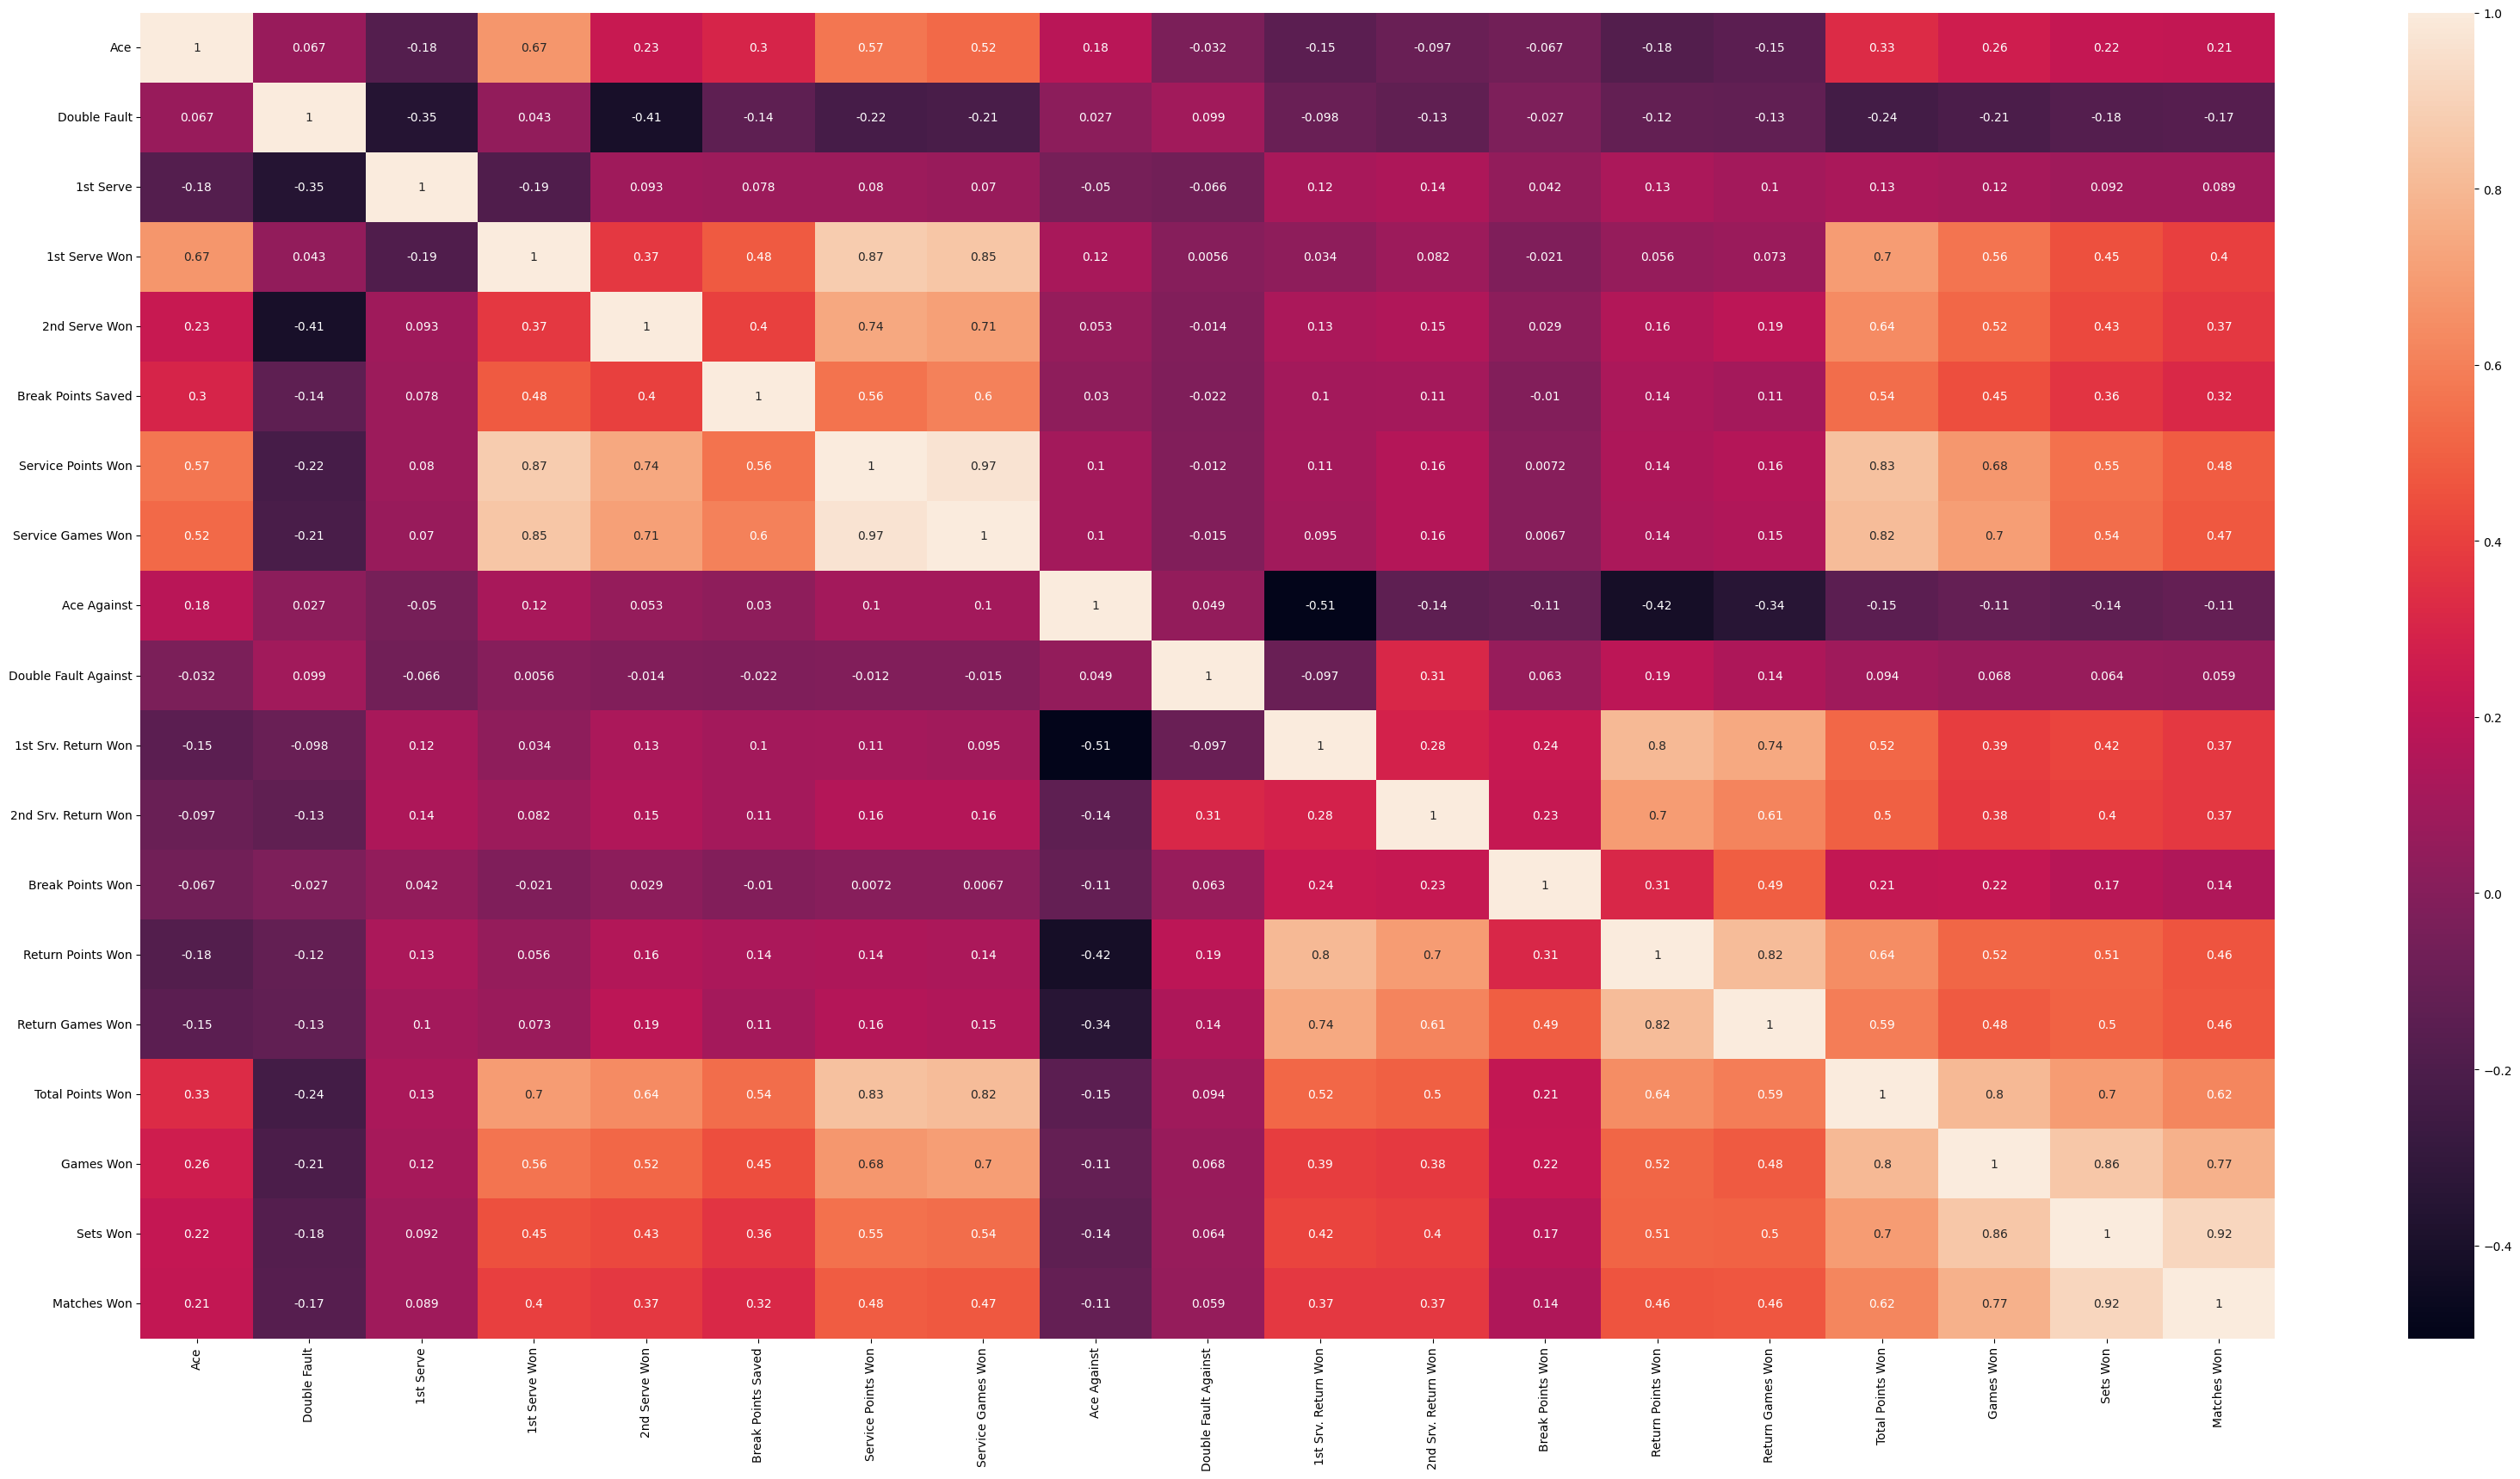

In [ ]:
# Mapa de correlación entre variables
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True)
plt.gcf().set_size_inches(40,20)

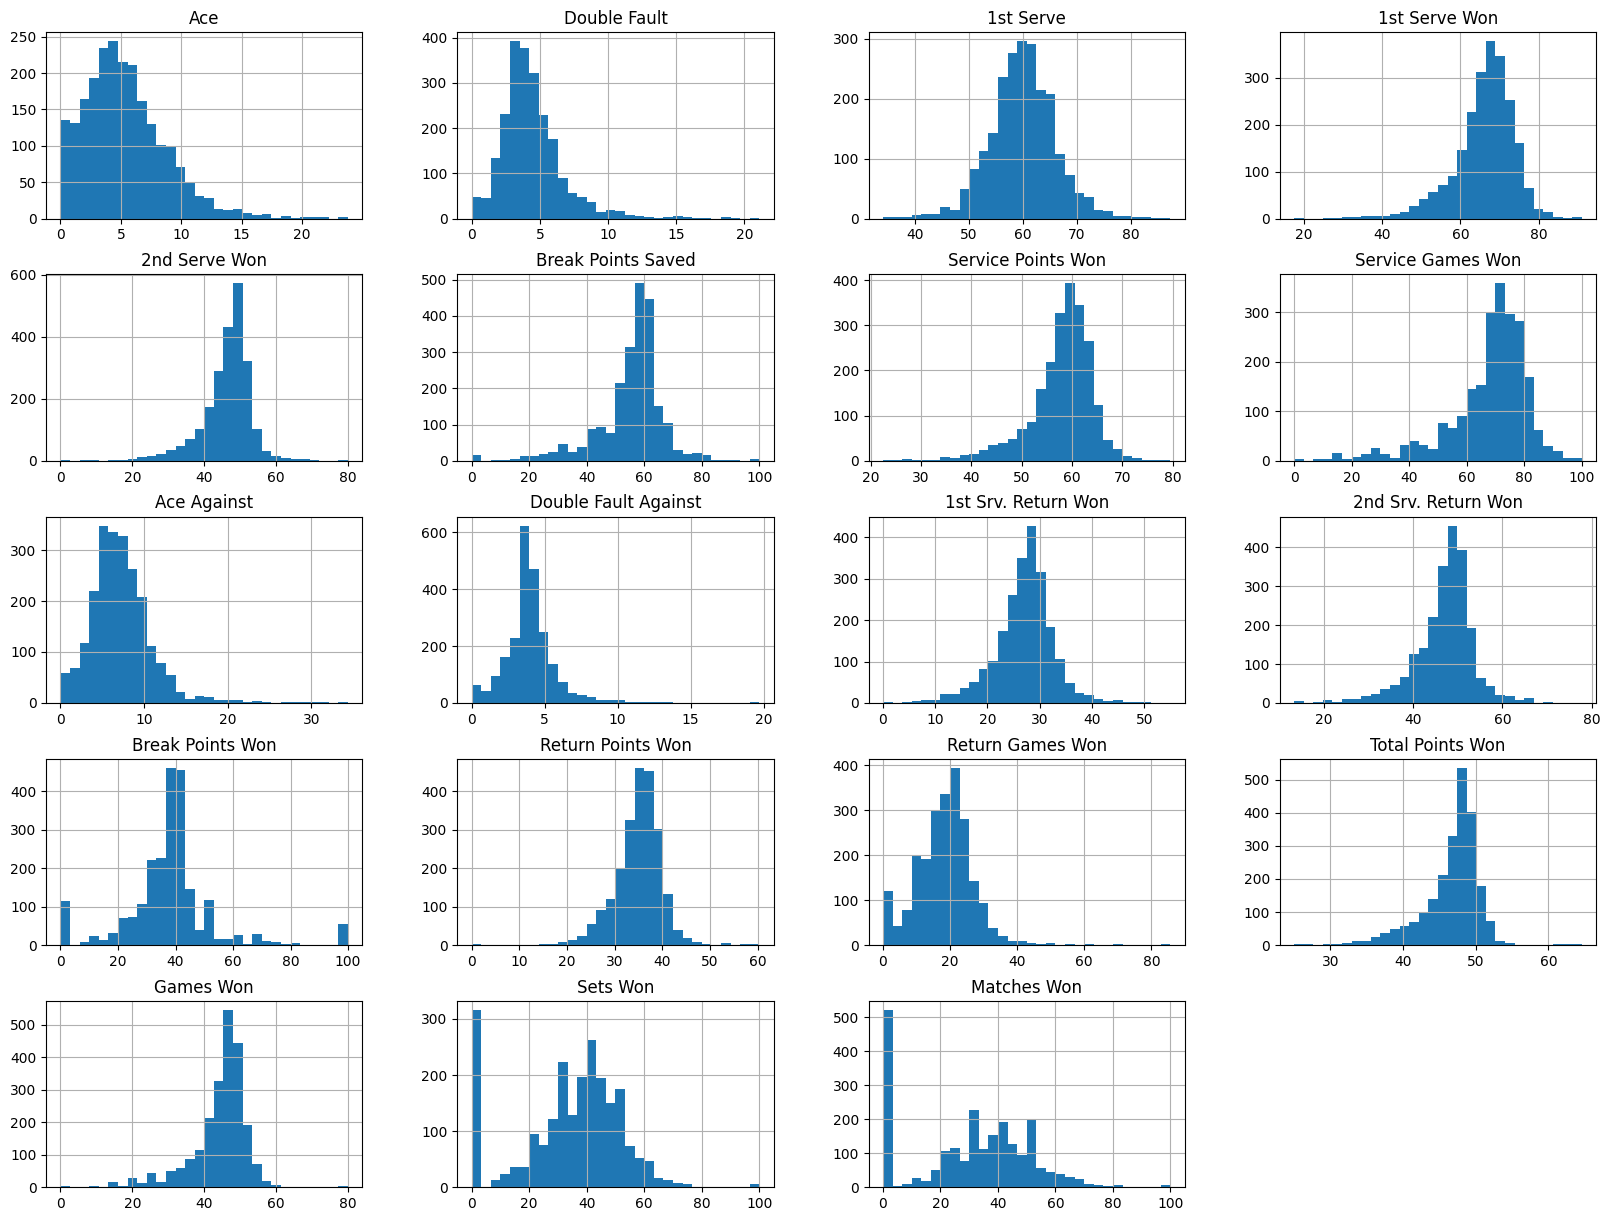

In [ ]:
# Histograma de todas las variables
dataset.hist(bins=30, figsize=(20,15))
plt.show()

## Entrenamos varios modelos

Eliminar la característica "porcentaje de sets ganados" podría tener sentido si consideramos que esta variable es demasiado correlacionada con la variable objetivo (Matches Won) y puede estar introduciendo un sesgo en el modelo. A veces, las características que son demasiado obvias pueden dominar el modelo y ocultar la importancia de otras variables que también pueden tener un impacto significativo. Pasa igual con Games Won.

In [ ]:
# Eliminamos la característica 'porcentaje de sets ganados' y 'games won'
dataset = dataset.drop(columns=['Sets Won', 'Games Won'])

In [ ]:
# Separamos las características (features) de la etiqueta (target)
X = dataset.drop('Matches Won', axis=1)
y = dataset['Matches Won']

# Transformación logarítmica de la variable objetivo para no predecir resultados negativos
y_log = np.log1p(y)

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definimos los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluamos cada modelo utilizando validación cruzada
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = (-cv_scores.mean(), cv_scores.std())

# Mostramos resultados de validación cruzada
for name, (mean_score, std_dev) in results.items():
    print(f"{name}: Mean MSE = {mean_score:.2f}, Std Dev = {std_dev:.2f}")

Linear Regression: Mean MSE = 1.65, Std Dev = 0.11
Ridge Regression: Mean MSE = 1.65, Std Dev = 0.11
Lasso Regression: Mean MSE = 2.45, Std Dev = 0.09
Random Forest: Mean MSE = 1.34, Std Dev = 0.15
Gradient Boosting: Mean MSE = 1.37, Std Dev = 0.13
XGBoost: Mean MSE = 1.55, Std Dev = 0.12


In [ ]:
# Seleccionamos el mejor modelo basado en el menor MSE
best_model_name = min(results, key=lambda x: results[x][0])
best_model = models[best_model_name]
print(f"Best model: {best_model_name}")

Best model: Random Forest


In [ ]:
# Definimos la cuadrícula de hiperparámetros para RandomizedSearchCV
param_grid = {
    'Random Forest': {
        'n_estimators': randint(100, 200),
        'max_depth': [None, 10, 20],
        'min_samples_split': randint(2, 10)
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 200),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(3, 10)
    },
    'XGBoost': {
        'n_estimators': randint(100, 200),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(3, 10)
    }
}

# Realizamos RandomizedSearchCV solo si el mejor modelo está en la lista de hiperparámetros
if best_model_name in param_grid:
    random_search = RandomizedSearchCV(best_model, param_distributions=param_grid[best_model_name], n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train_scaled, y_train)
    best_model = random_search.best_estimator_
    print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'max_depth': 20, 'min_samples_split': 9, 'n_estimators': 177}


# Análisis de resultados

In [ ]:
# Evaluamos el mejor modelo en el conjunto de prueba
y_test_pred_log = best_model.predict(X_test_scaled)

# Revertimos la transformación logarítmica
y_test_pred = np.expm1(y_test_pred_log)

# Nos de que las predicciones no sean negativas
y_test_pred = np.maximum(0, y_test_pred)

# Revertimos la transformación logarítmica para y_test
y_test_actual = np.expm1(y_test)

# Evaluamos el rendimiento del mejor modelo con hiperparámetros optimizados
test_mse = mean_squared_error(y_test_actual, y_test_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)
test_mae = mean_absolute_error(y_test_actual, y_test_pred)
test_rmse = np.sqrt(test_mse)

print(f"Best Model Test MSE: {test_mse:.2f}")
print(f"Best Model Test R²: {test_r2:.2f}")
print(f"Best Model Test MAE: {test_mae:.2f}")
print(f"Best Model Test RMSE: {test_rmse:.2f}")

Best Model Test MSE: 236.23
Best Model Test R²: 0.44
Best Model Test MAE: 9.71
Best Model Test RMSE: 15.37


In [ ]:
# Mostramos todos los valores reales y predichos
results_df = pd.DataFrame({
    'Actual': y_test_actual,
    'Predicted': y_test_pred
})

print(results_df)

      Actual  Predicted
2064    41.8  47.234780
1321     0.0   0.535682
859     50.6  51.700748
408     37.5  30.781915
629     66.6  61.697907
...      ...        ...
203     26.9   9.108920
1879     0.0   1.664071
719     22.2  39.840296
1134    58.0  59.417552
618      0.0  19.551471

[455 rows x 2 columns]


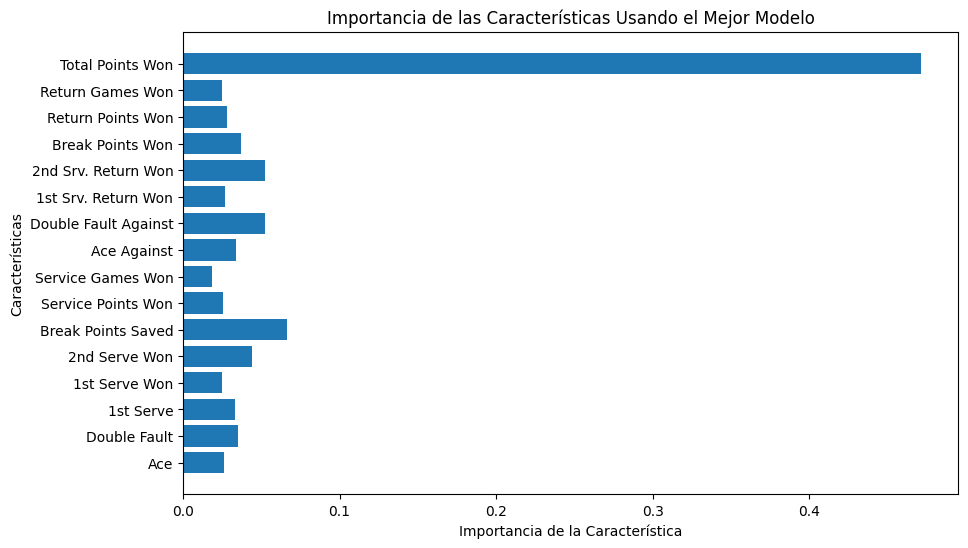

In [ ]:
# Análisis de importancia de características
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    features = X.columns

    # Visualizar importancia de características
    plt.figure(figsize=(10,6))
    plt.barh(features, feature_importances)
    plt.xlabel('Importancia de la Característica')
    plt.ylabel('Características')
    plt.title('Importancia de las Características Usando el Mejor Modelo')
    plt.show()

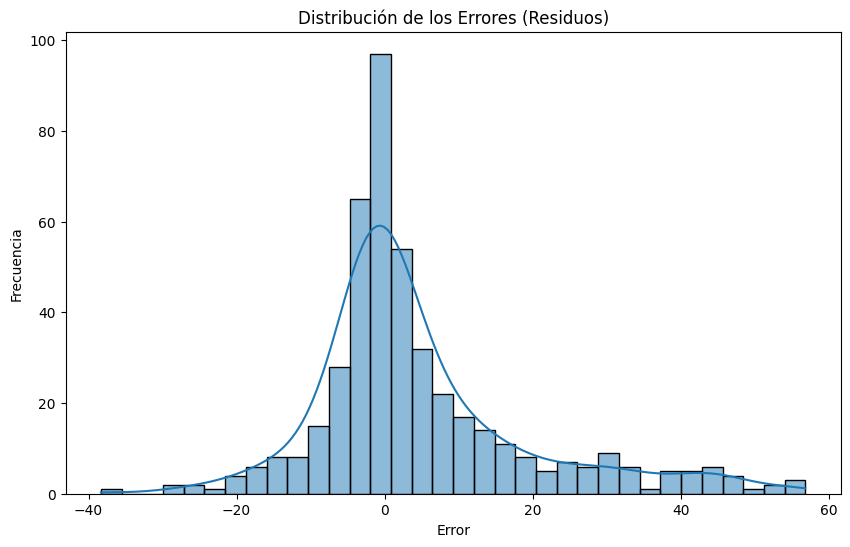

In [ ]:
# Visualización de la distribución de errores
residuals = y_test_actual - y_test_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de los Errores (Residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

## Entrenar un modelo eliminando los porcentajes de victoria de 0%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

In [ ]:
# Cargamos dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_historical_and_individual_stats.csv')

# Eliminamos las características 'Sets Won' y 'Games Won'
dataset = dataset.drop(columns=['Sets Won', 'Games Won'])

# Filtramos los jugadores con 0% de porcentaje de victorias
dataset = dataset[dataset['Matches Won'] > 0]

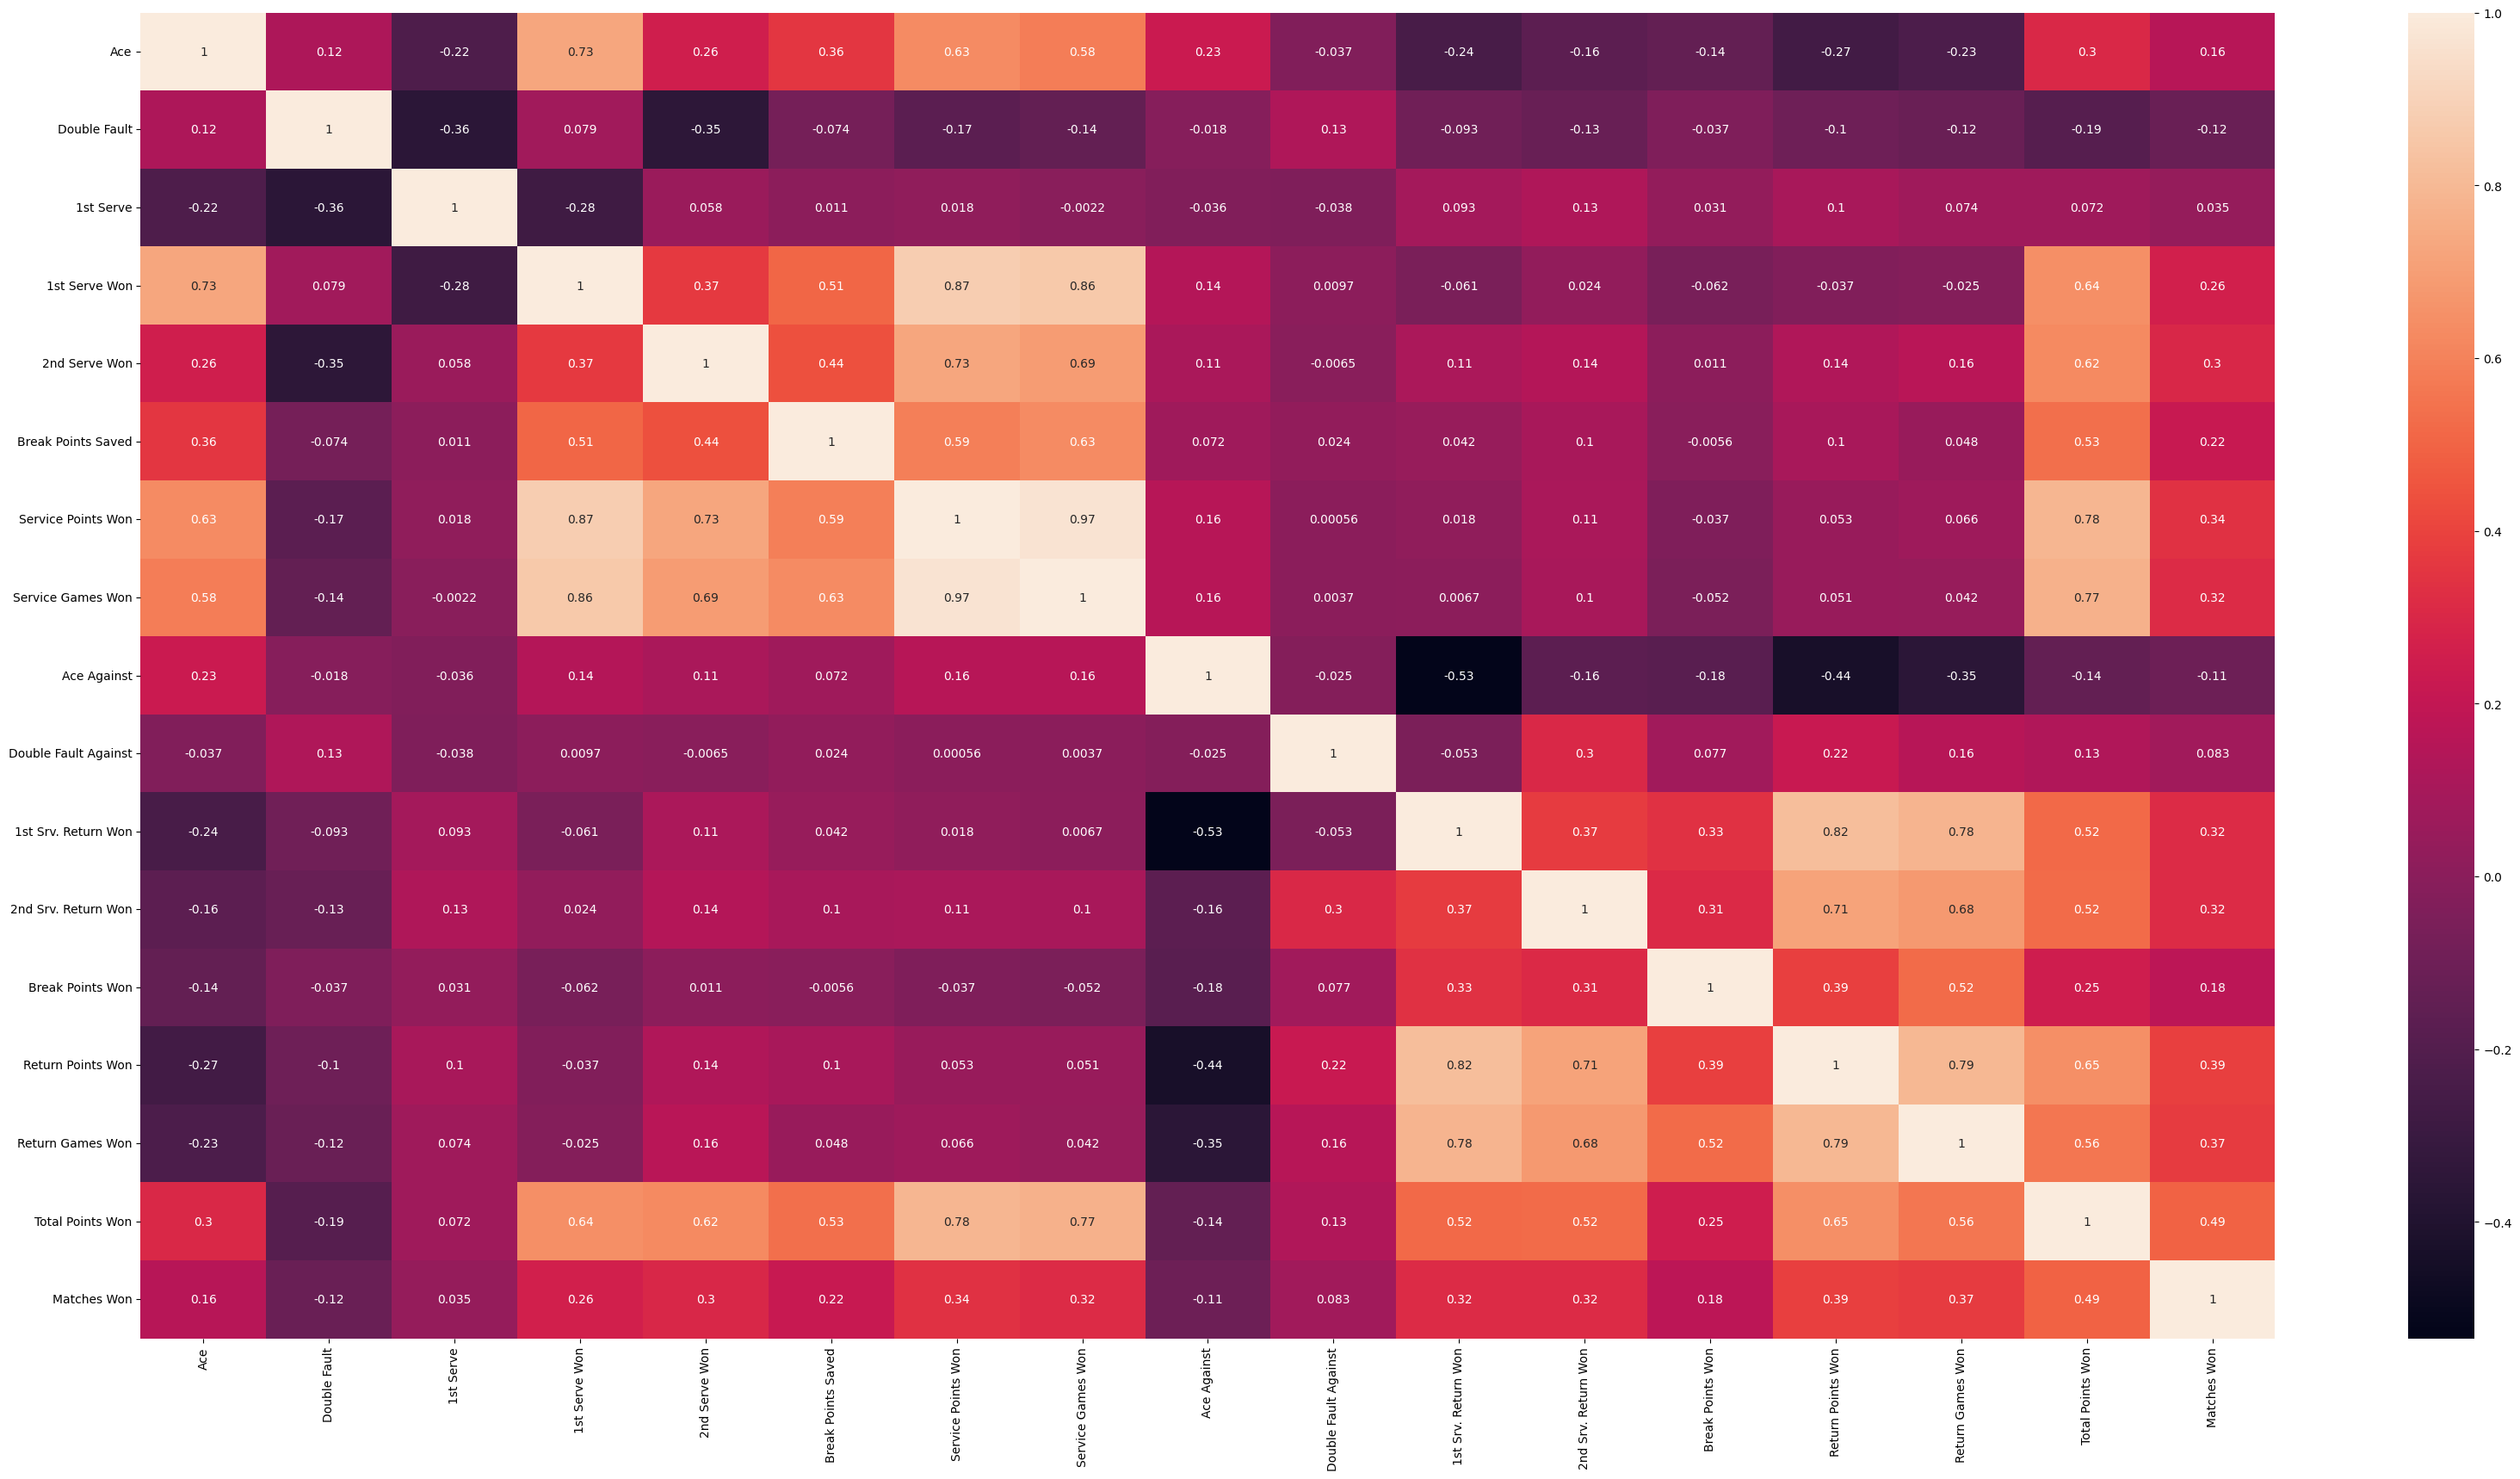

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.gcf().set_size_inches(40,20)
plt.show()

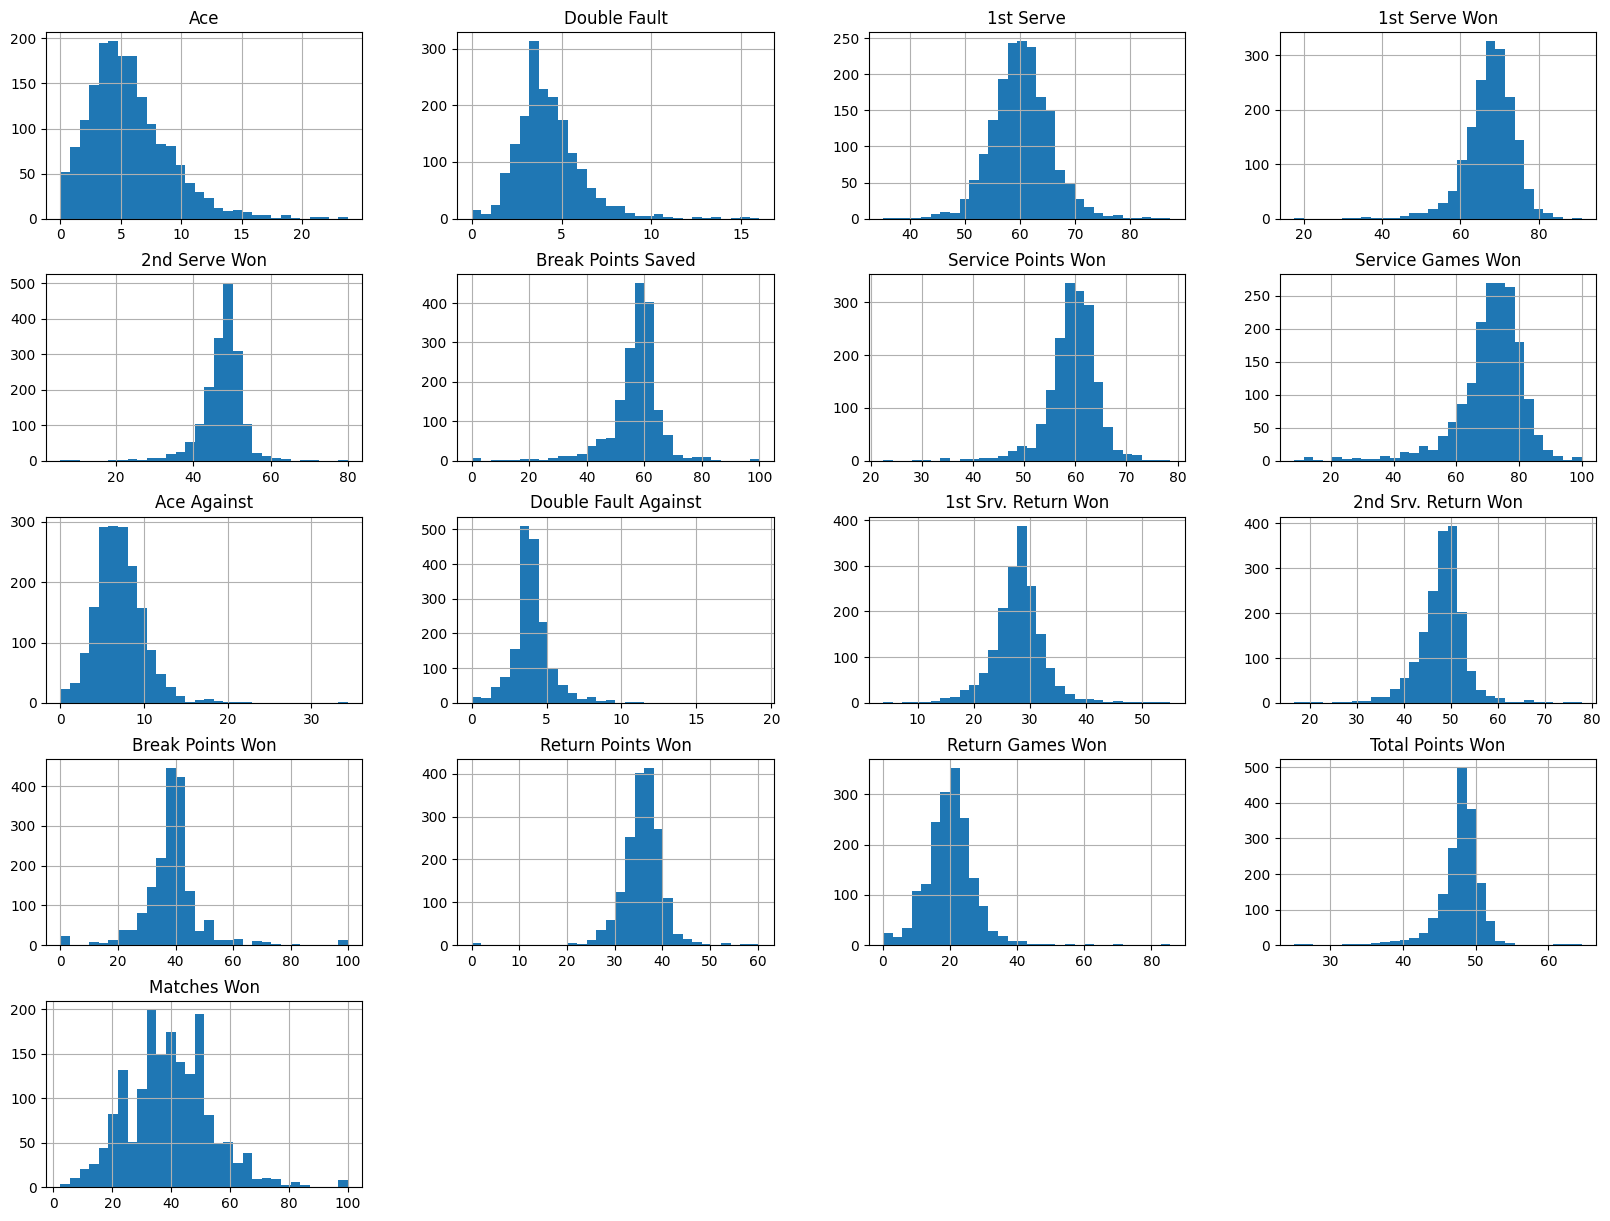

In [ ]:
# Análisis de distribución de variables
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
# Separamos las características (features) de la etiqueta (target)
X = dataset.drop('Matches Won', axis=1)
y = dataset['Matches Won']

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definimos los modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluamos cada modelo utilizando validación cruzada
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    results[name] = (-cv_scores.mean(), cv_scores.std())

# Mostramos resultados de validación cruzada
for name, (mean_score, std_dev) in results.items():
    print(f"{name}: Mean MSE = {mean_score:.2f}, Std Dev = {std_dev:.2f}")

Linear Regression: Mean MSE = 0.13, Std Dev = 0.01
Ridge Regression: Mean MSE = 0.13, Std Dev = 0.01
Lasso Regression: Mean MSE = 0.16, Std Dev = 0.02
Random Forest: Mean MSE = 0.10, Std Dev = 0.01
Gradient Boosting: Mean MSE = 0.10, Std Dev = 0.01
XGBoost: Mean MSE = 0.12, Std Dev = 0.01


In [ ]:
# Seleccionamos el mejor modelo basado en el menor MSE
best_model_name = min(results, key=lambda x: results[x][0])
best_model = models[best_model_name]
print(f"Best model: {best_model_name}")

Best model: Gradient Boosting


In [ ]:
# Definimos la cuadrícula de hiperparámetros para RandomizedSearchCV
param_grid = {
    'Random Forest': {
        'n_estimators': randint(100, 200),
        'max_depth': [None, 10, 20],
        'min_samples_split': randint(2, 10)
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 200),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(3, 10)
    },
    'XGBoost': {
        'n_estimators': randint(100, 200),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(3, 10)
    }
}

# Realizamos RandomizedSearchCV solo si el mejor modelo está en la lista de hiperparámetros
if best_model_name in param_grid:
    random_search = RandomizedSearchCV(best_model, param_distributions=param_grid[best_model_name], n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train_scaled, y_train)
    best_model = random_search.best_estimator_
    print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'learning_rate': 0.011563640674119394, 'max_depth': 3, 'n_estimators': 187}


In [ ]:
# Evaluamos el mejor modelo en el conjunto de prueba
y_test_pred_log = best_model.predict(X_test_scaled)

# Revertimos la transformación logarítmica
y_test_pred = np.expm1(y_test_pred_log)

# Nos aseguramos de que las predicciones no sean negativas
y_test_pred = np.maximum(0, y_test_pred)

# Revertimos la transformación logarítmica para y_test
y_test_actual = np.expm1(y_test)

# Evaluamos el rendimiento del modelo
test_mse = mean_squared_error(y_test_actual, y_test_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)
test_mae = mean_absolute_error(y_test_actual, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f"Best Model Test MSE: {test_mse:.2f}")
print(f"Best Model Test R²: {test_r2:.2f}")
print(f"Best Model Test MAE: {test_mae:.2f}")
print(f"Best Model Test RMSE: {test_rmse:.2f}")

Best Model Test MSE: 123.09
Best Model Test R²: 0.34
Best Model Test MAE: 7.86
Best Model Test RMSE: 11.09


In [ ]:
# Mostramos todos los valores reales y predichos
results_df = pd.DataFrame({
    'Actual': y_test_actual,
    'Predicted': y_test_pred
})

print(results_df)

      Actual  Predicted
355     36.8  38.296116
453     48.2  46.604520
449     50.8  46.063186
514     40.0  42.144084
1925    71.4  58.731381
...      ...        ...
2093    50.0  47.990593
827     45.9  42.769566
486     40.6  39.158250
1508    50.0  38.857895
1142    33.3  31.894506

[351 rows x 2 columns]


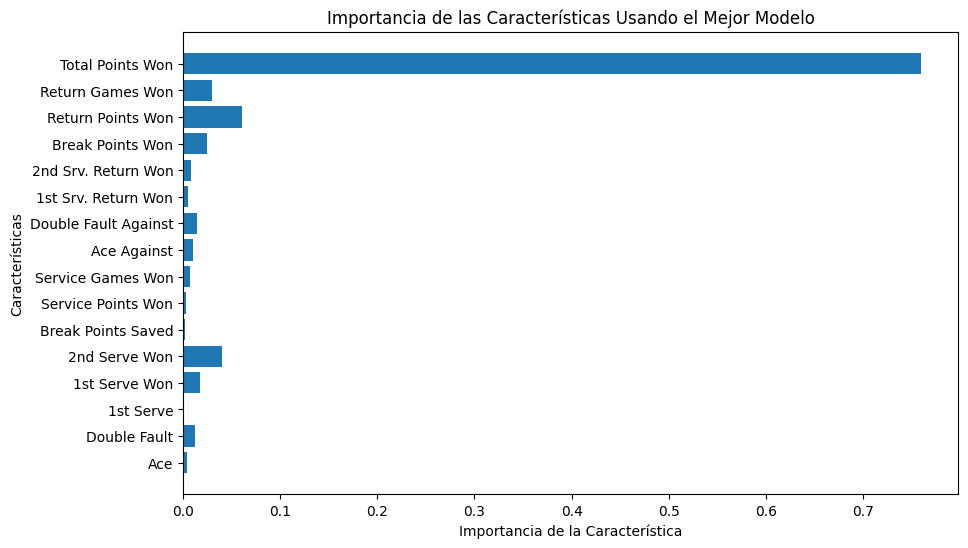

In [ ]:
# Análisis de importancia de características
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    features = X.columns

    # Visualizar importancia de características
    plt.figure(figsize=(10,6))
    plt.barh(features, feature_importances)
    plt.xlabel('Importancia de la Característica')
    plt.ylabel('Características')
    plt.title('Importancia de las Características Usando el Mejor Modelo')
    plt.show()


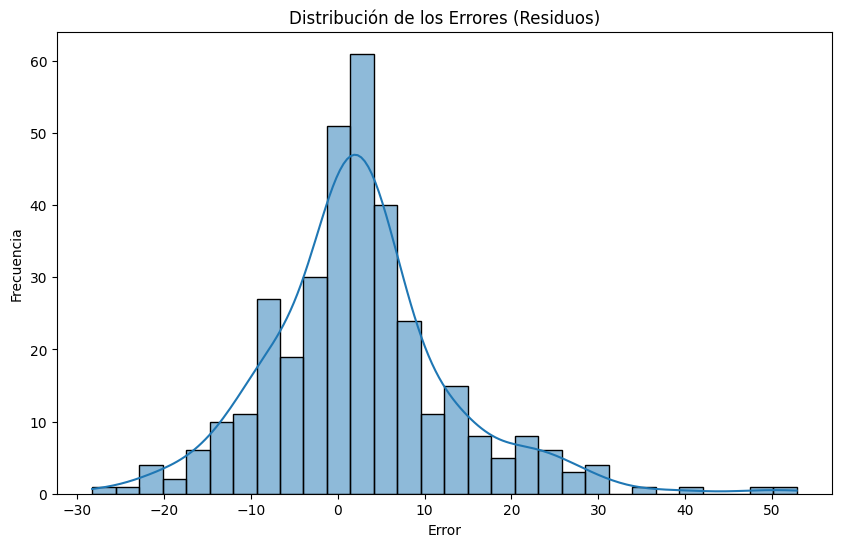

In [ ]:
# Visualización de la distribución de errores
residuals = y_test_actual - y_test_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de los Errores (Residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

## Entrenar un modelo binario y después uno regresivo

Entrenar un modelo primero que prediga si un jugador ha ganado al menos un cierto porcentaje o no y luego de los que han ganado un cierto porcentaje entrenar un modelo regresivo para acertar cuánto porcentaje

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

In [ ]:
# Cargamos dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_historical_and_individual_stats.csv')

# Eliminamos las características 'Sets Won' y 'Games Won'
dataset = dataset.drop(columns=['Sets Won', 'Games Won'])

## Análisis de los datos que tenemos

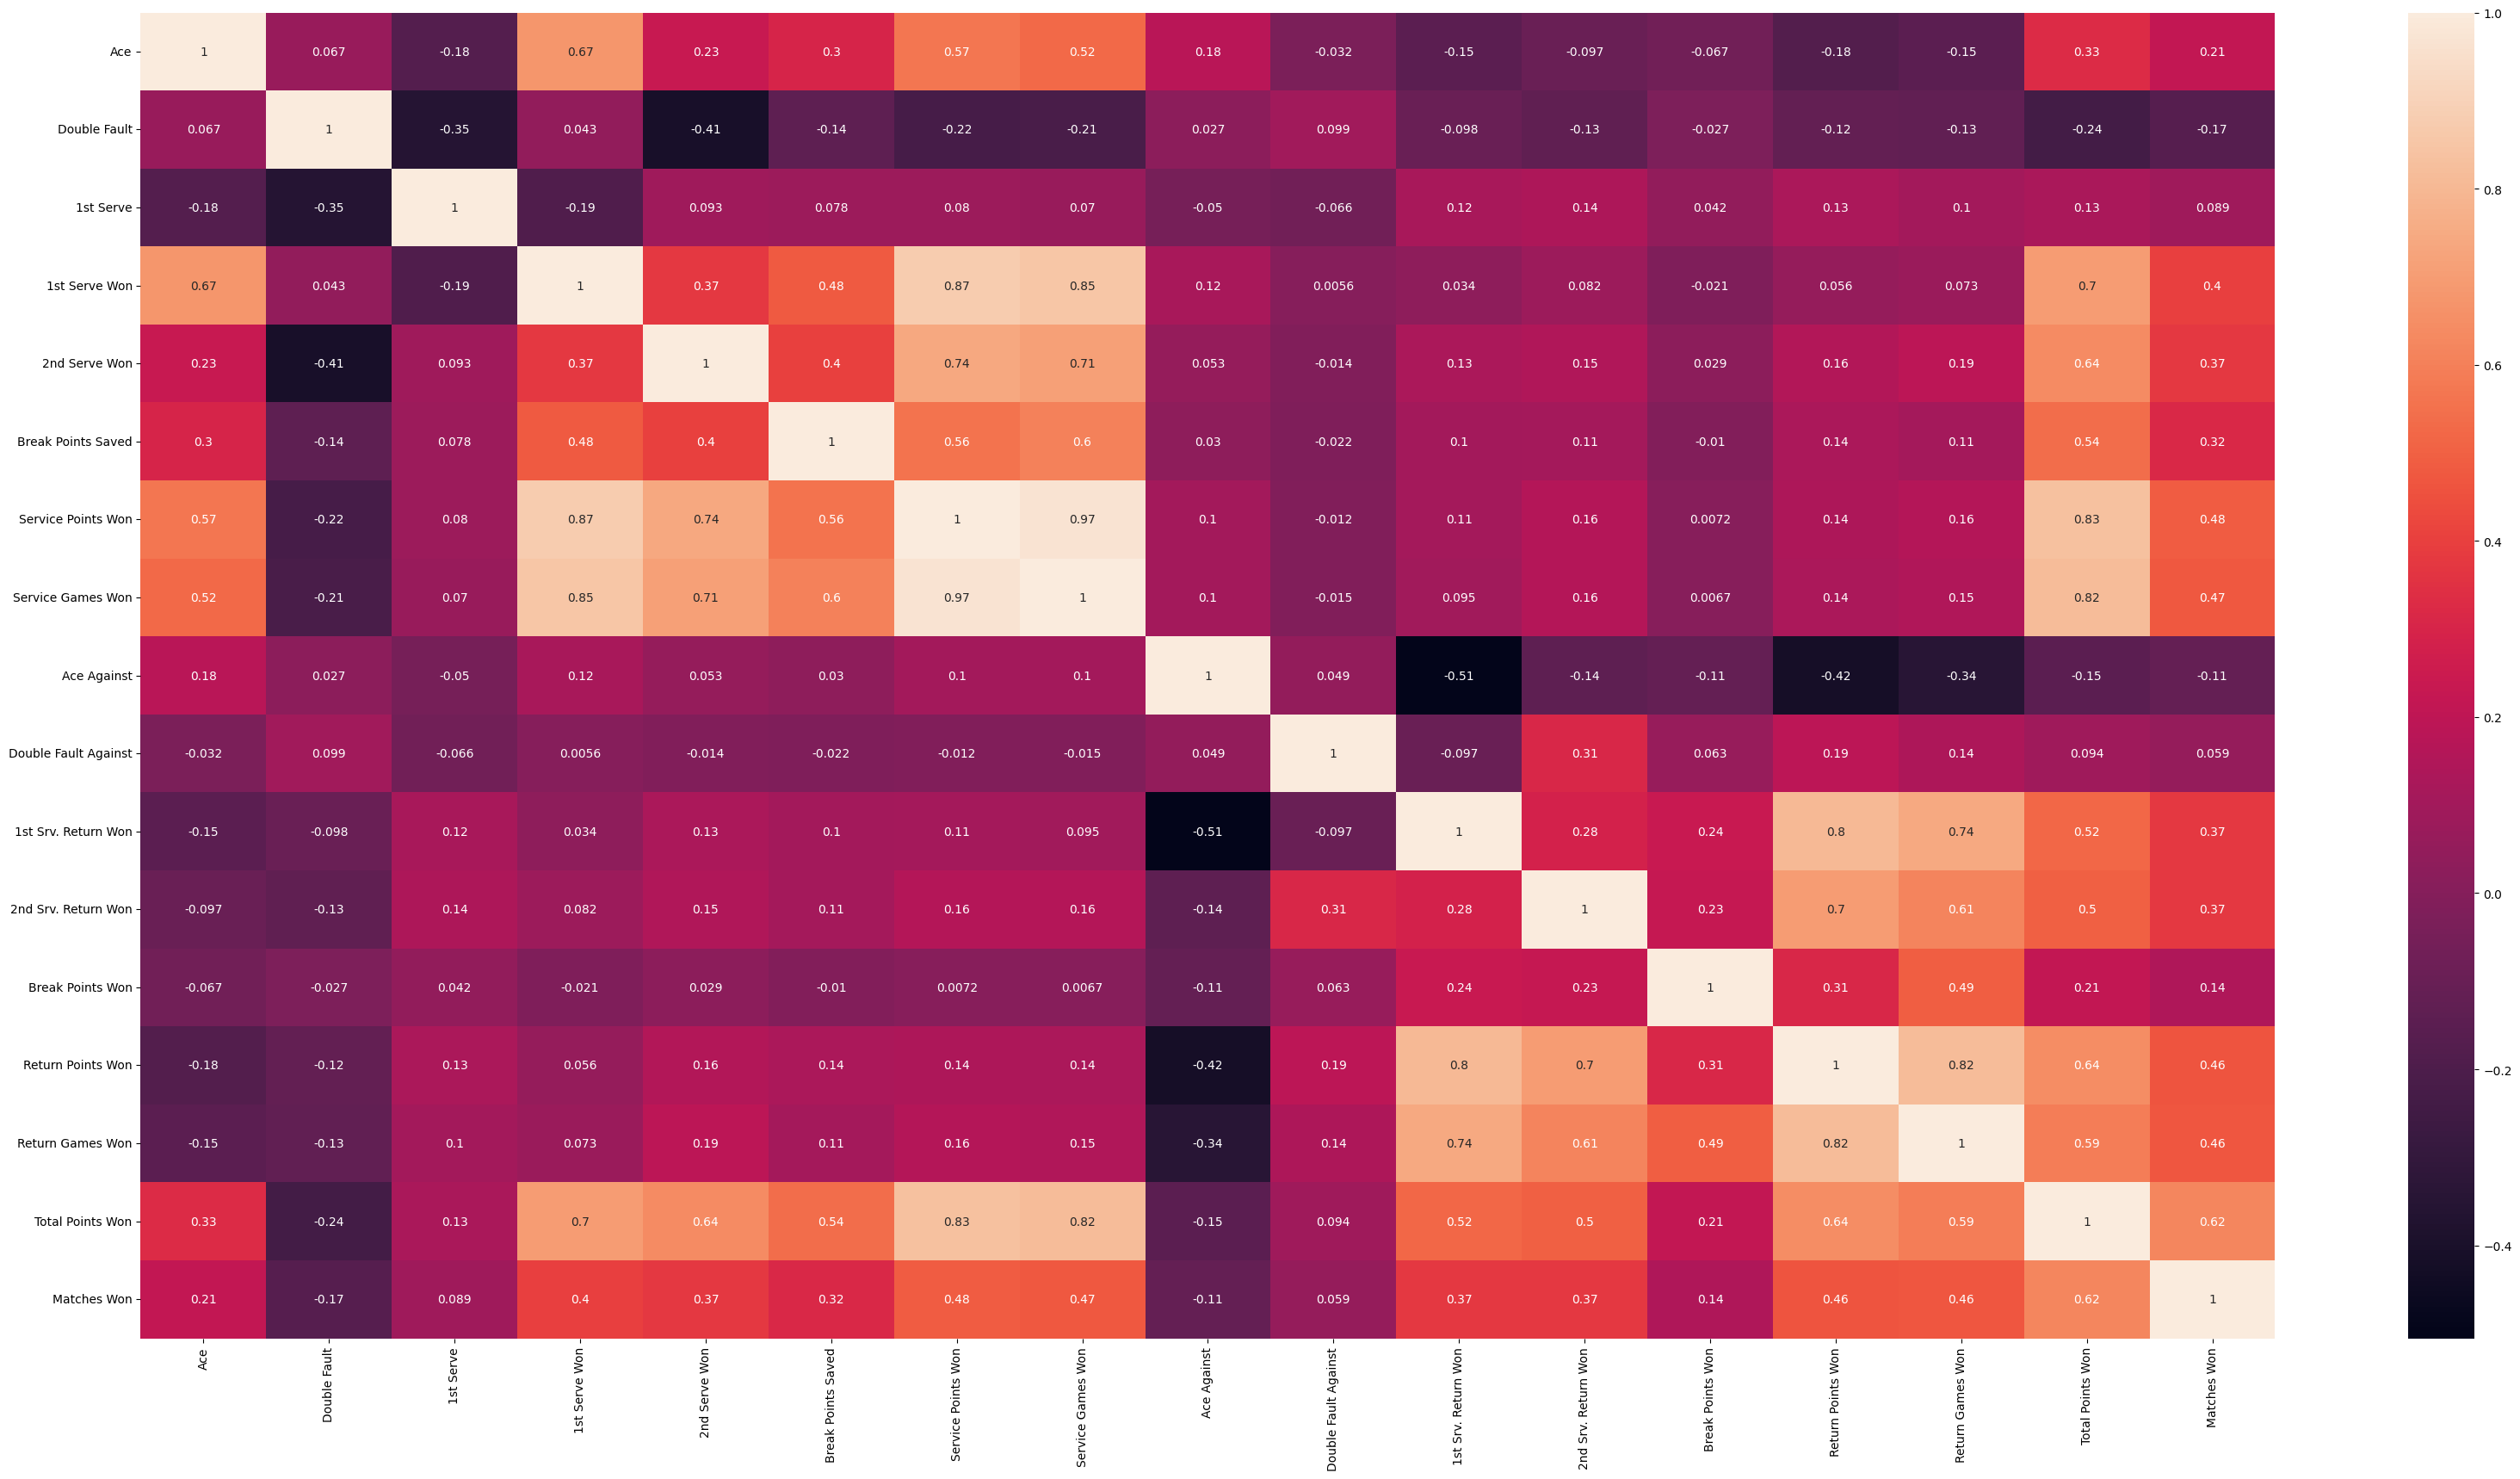

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.gcf().set_size_inches(40,20)
plt.show()

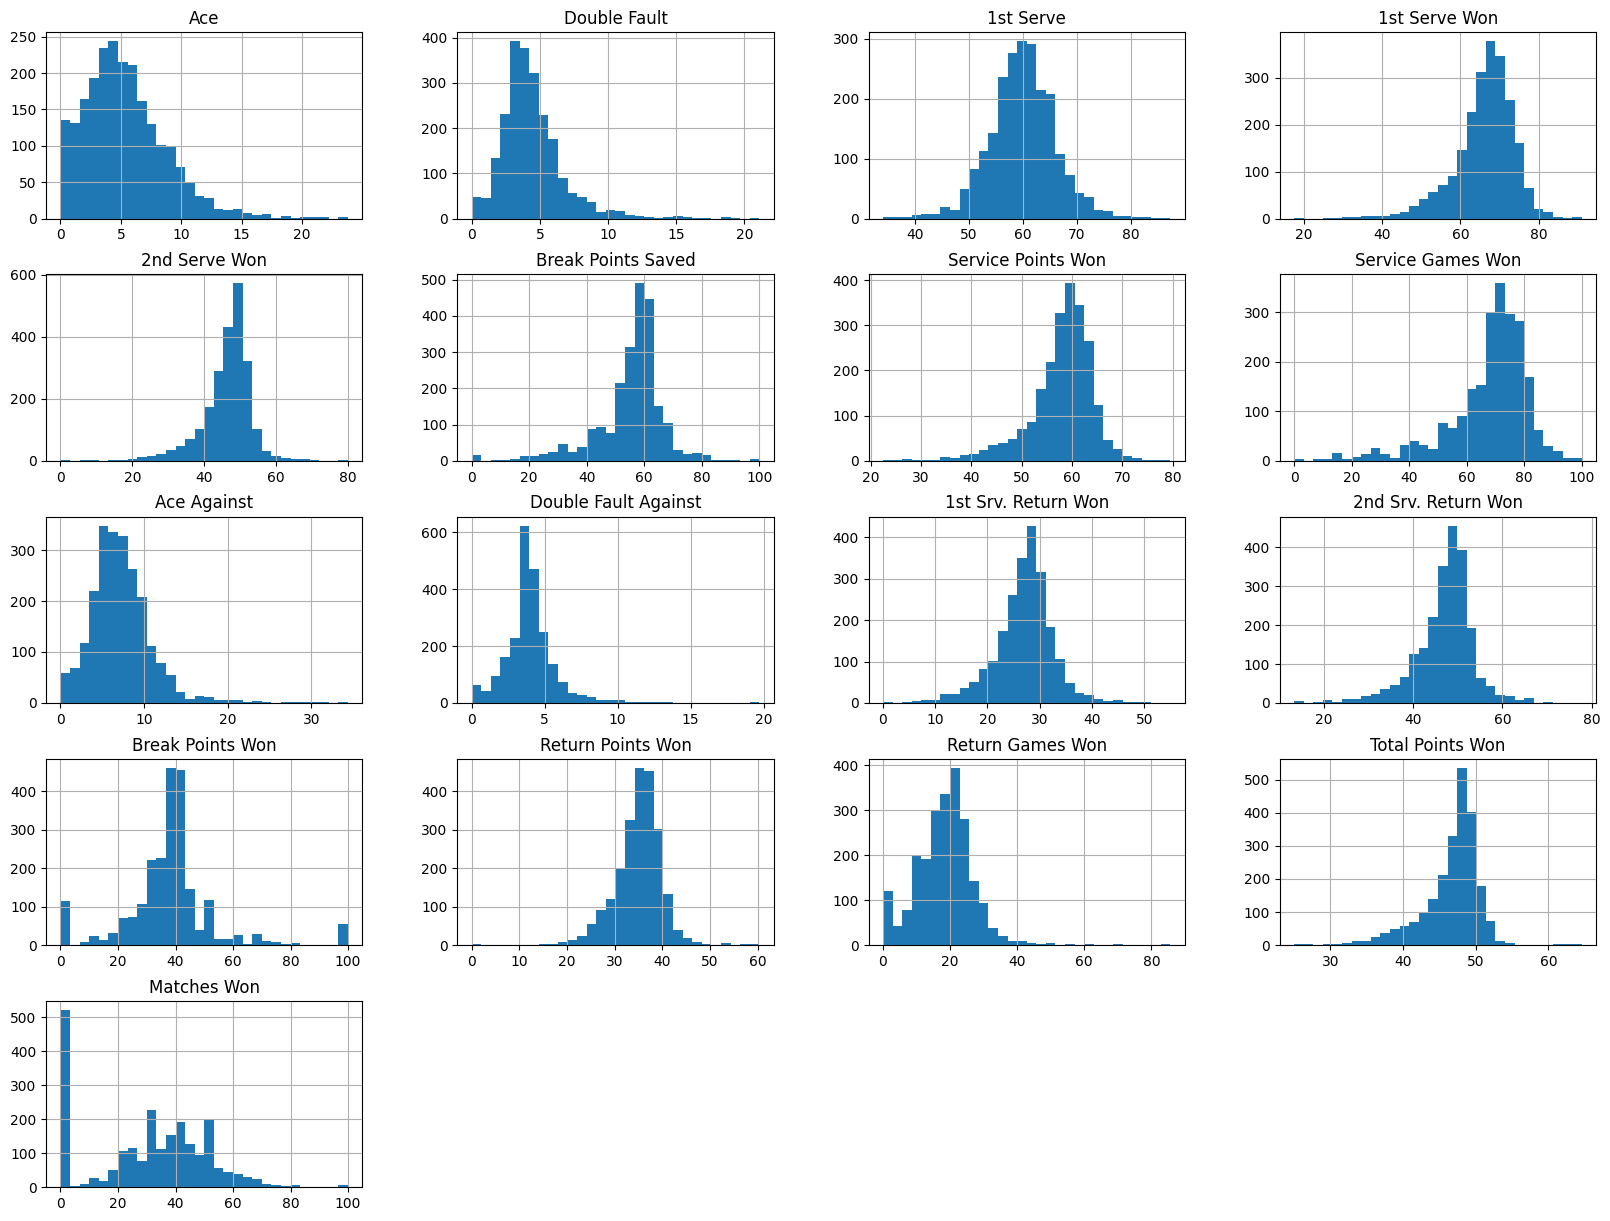

In [ ]:
# Análisis de distribución de variables
dataset.hist(bins=30, figsize=(20,15))
plt.show()

## Entrenamiento modelo binario

In [ ]:
# Creamos variable binaria para predecir si un jugador ganará al menos un partido
dataset['Won_Match'] = dataset['Matches Won'] > 0

# Separamos las características (features) de la etiqueta binaria (target binario)
X_binary = dataset.drop(['Matches Won', 'Won_Match'], axis=1)
y_binary = dataset['Won_Match']

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) para modelo binario
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)

In [ ]:
# Definimos los modelos a evaluar para el modelo binario
binary_models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Evaluamos cada modelo utilizando validación cruzada
binary_results = {}
for name, model in binary_models.items():
    cv_scores = cross_val_score(model, X_train_bin_scaled, y_train_bin, cv=5, scoring='accuracy')
    binary_results[name] = (cv_scores.mean(), cv_scores.std())

# Mostramos resultados de validación cruzada
for name, (mean_score, std_dev) in binary_results.items():
    print(f"{name}: Mean Accuracy = {mean_score:.2f}, Std Dev = {std_dev:.2f}")

Logistic Regression: Mean Accuracy = 0.83, Std Dev = 0.02
Random Forest: Mean Accuracy = 0.86, Std Dev = 0.01
XGBoost: Mean Accuracy = 0.84, Std Dev = 0.01


In [ ]:
# Seleccionamos el mejor modelo binario basado en la mayor accuracy
best_binary_model_name = max(binary_results, key=lambda x: binary_results[x][0])
best_binary_model = binary_models[best_binary_model_name]
print(f"Best binary model: {best_binary_model_name}")

Best binary model: Random Forest


In [ ]:
# Entrenamos el mejor modelo binario
best_binary_model.fit(X_train_bin_scaled, y_train_bin)

RandomForestClassifier(random_state=42)

## Evaluar modelo binario

In [ ]:
# Evaluamos el mejor modelo binario en el conjunto de prueba
y_test_bin_pred = best_binary_model.predict(X_test_bin_scaled)
binary_accuracy = accuracy_score(y_test_bin, y_test_bin_pred)
print(f"Best Binary Model Test Accuracy: {binary_accuracy:.2f}")
print(confusion_matrix(y_test_bin, y_test_bin_pred))

Best Binary Model Test Accuracy: 0.87
[[ 64  40]
 [ 19 332]]


## Entrenamiento modelo regresivo para los que ganarán al menos un partido

In [ ]:
# Predecimos en todo el dataset para obtener las predicciones binarias
y_pred_bin_all = best_binary_model.predict(scaler_bin.transform(X_binary))

# Filtramos los jugadores que se predice que ganarán al menos un partido
X_regression = X_binary[y_pred_bin_all == 1]
y_regression = dataset[y_pred_bin_all == 1]['Matches Won']

# Transformación logarítmica de la variable objetivo
y_regression_log = np.log1p(y_regression)

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) para modelo de regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [ ]:
# Definimos los modelos a evaluar para el modelo de regresión
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Evaluamos cada modelo utilizando validación cruzada
regression_results = {}
for name, model in regression_models.items():
    cv_scores = cross_val_score(model, X_train_reg_scaled, y_train_reg, cv=5, scoring='neg_mean_squared_error')
    regression_results[name] = (-cv_scores.mean(), cv_scores.std())

# Mostramos resultados de validación cruzada
for name, (mean_score, std_dev) in regression_results.items():
    print(f"{name}: Mean MSE = {mean_score:.2f}, Std Dev = {std_dev:.2f}")

Linear Regression: Mean MSE = 0.43, Std Dev = 0.10
Ridge Regression: Mean MSE = 0.43, Std Dev = 0.10
Lasso Regression: Mean MSE = 0.48, Std Dev = 0.14
Random Forest: Mean MSE = 0.42, Std Dev = 0.09
Gradient Boosting: Mean MSE = 0.45, Std Dev = 0.10
XGBoost: Mean MSE = 0.45, Std Dev = 0.08


In [ ]:
# Seleccionamos el mejor modelo regresivo basado en el menor MSE
best_regression_model_name = min(regression_results, key=lambda x: regression_results[x][0])
best_regression_model = regression_models[best_regression_model_name]
print(f"Best regression model: {best_regression_model_name}")

Best regression model: Random Forest


In [ ]:
# Definimos la cuadrícula de hiperparámetros para RandomizedSearchCV
param_grid_regression = {
    'Random Forest': {
        'n_estimators': randint(100, 200),
        'max_depth': [None, 10, 20],
        'min_samples_split': randint(2, 10)
    },
    'Gradient Boosting': {
        'n_estimators': randint(100, 200),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(3, 10)
    },
    'XGBoost': {
        'n_estimators': randint(100, 200),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': randint(3, 10)
    }
}

# Realizamos RandomizedSearchCV solo si el mejor modelo está en la lista de hiperparámetros
if best_regression_model_name in param_grid_regression:
    random_search = RandomizedSearchCV(best_regression_model, param_distributions=param_grid_regression[best_regression_model_name], n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train_reg_scaled, y_train_reg)
    best_regression_model = random_search.best_estimator_
    print(f"Best parameters: {random_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 147}


## Análisis de resultados modelo regresivo

In [ ]:
# Evaluamos el mejor modelo regresivo en el conjunto de prueba
y_test_reg_pred_log = best_regression_model.predict(X_test_reg_scaled)

# Revertimos la transformación logarítmica
y_test_reg_pred = np.expm1(y_test_reg_pred_log)

# Nos aseguramos de que las predicciones no sean negativas
y_test_reg_pred = np.maximum(0, y_test_reg_pred)

# Revertimos la transformación logarítmica para y_test
y_test_reg_actual = np.expm1(y_test_reg)

# Evaluamos el rendimiento del modelo regresivo
test_mse_reg = mean_squared_error(y_test_reg_actual, y_test_reg_pred)
test_r2_reg = r2_score(y_test_reg_actual, y_test_reg_pred)
test_mae_reg = mean_absolute_error(y_test_reg_actual, y_test_reg_pred)
test_rmse_reg = np.sqrt(test_mse_reg)
print(f"Best Regression Model Test MSE: {test_mse_reg:.2f}")
print(f"Best Regression Model Test R²: {test_r2_reg:.2f}")
print(f"Best Regression Model Test MAE: {test_mae_reg:.2f}")
print(f"Best Regression Model Test RMSE: {test_rmse_reg:.2f}")

Best Regression Model Test MSE: 148.60
Best Regression Model Test R²: 0.21
Best Regression Model Test MAE: 8.16
Best Regression Model Test RMSE: 12.19


In [ ]:
# Mostramos todos los valores reales y predichos
results_df_reg = pd.DataFrame({
    'Actual': y_test_reg_actual,
    'Predicted': y_test_reg_pred
})

print(results_df_reg)

      Actual  Predicted
70      43.2  16.414416
1329    33.3  37.425031
1239    40.0  32.279801
377     25.0  16.597233
632     52.2  15.050142
...      ...        ...
2256    54.3  48.217487
1214    50.0  34.008028
881     48.1  34.167781
461     41.5  46.828725
1853    33.3  32.751710

[355 rows x 2 columns]


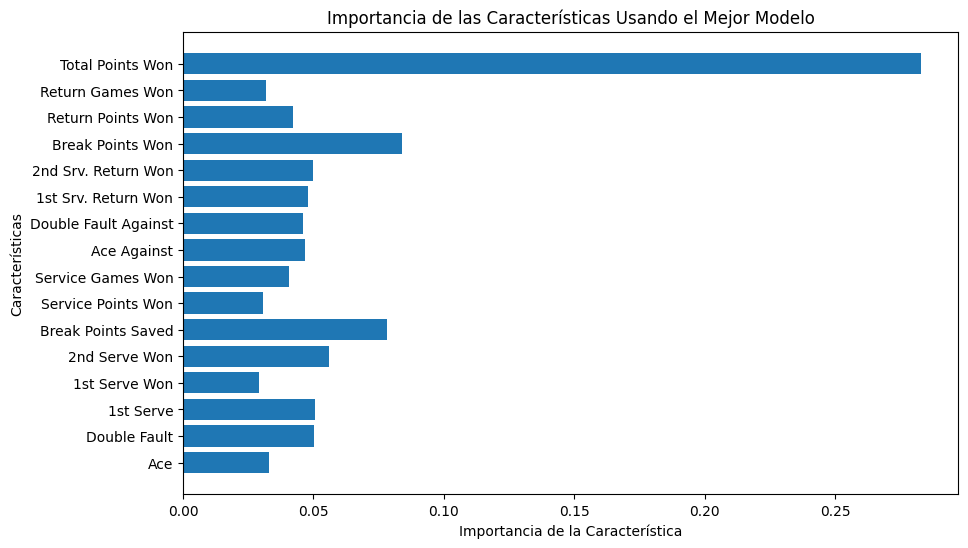

In [ ]:
# Análisis de importancia de características para el modelo regresivo
if hasattr(best_regression_model, 'feature_importances_'):
    feature_importances = best_regression_model.feature_importances_
    features = X_regression.columns

    # Visualizar importancia de características
    plt.figure(figsize=(10,6))
    plt.barh(features, feature_importances)
    plt.xlabel('Importancia de la Característica')
    plt.ylabel('Características')
    plt.title('Importancia de las Características Usando el Mejor Modelo')
    plt.show()


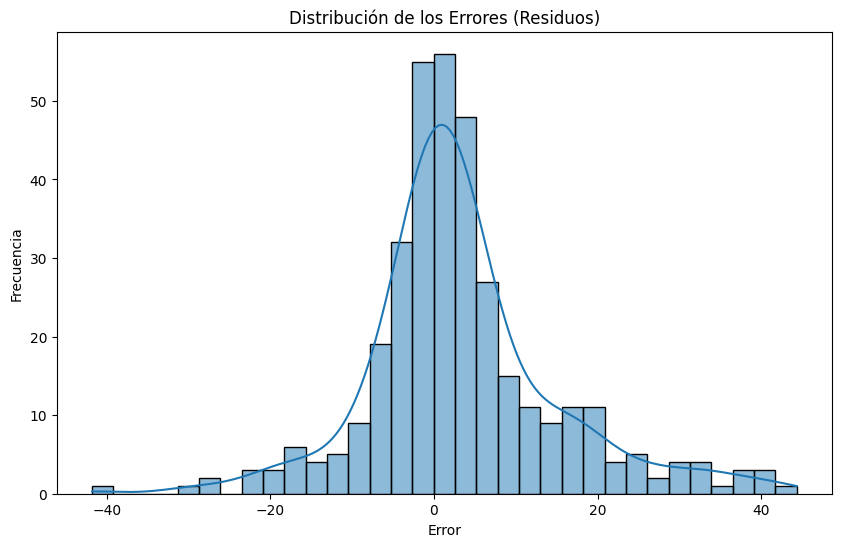

In [ ]:
# Visualización de la distribución de errores para el modelo regresivo
residuals_reg = y_test_reg_actual - y_test_reg_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals_reg, kde=True)
plt.title('Distribución de los Errores (Residuos)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

Yo creo que pruebo redes neuronales y esto está

# Redes Neuronales

In [ ]:
! pip install tensorflow keras

## Sin eliminar los jugadores con 0% de matches won


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Cargamos dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_historical_and_individual_stats.csv')

# Eliminamos las características 'Sets Won' y 'Games Won'
dataset = dataset.drop(columns=['Sets Won', 'Games Won'])

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.gcf().set_size_inches(40,20)
plt.show()

In [ ]:
# Análisis de distribución de variables
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
# Separamos las características (features) de la etiqueta (target)
X = dataset.drop('Matches Won', axis=1)
y = dataset['Matches Won']

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)

# Dividimosel dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape para la CNN y la RNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
# Definimos las redes neuronales
def create_dense_model(input_dim, layers, units, dropout_rate):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=input_dim))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_rnn_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(SimpleRNN(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_lstm_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_shape, filters, kernel_size, pool_size, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Parámetros para las redes neuronales
input_dim = X_train_scaled.shape[1]
input_shape_rnn = (X_train_rnn.shape[1], X_train_rnn.shape[2])
dense_layers_list = [2, 3]
units_list = [64, 128]
dropout_rate = 0.2
filters_list = [32, 64]
kernel_size = 3
pool_size = 2

# Evaluamos las redes neuronales
results_nn = {}

In [ ]:
# Redes densas
for layers in dense_layers_list:
    for units in units_list:
        model_name = f"Dense_{layers}_layers_{units}_units"
        print(f"Training model: {model_name}")
        model = create_dense_model(input_dim, layers, units, dropout_rate)
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

        y_test_pred_log = model.predict(X_test_scaled).flatten()
        y_test_pred = np.expm1(y_test_pred_log)
        y_test_pred = np.maximum(0, y_test_pred)
        y_test_actual = np.expm1(y_test)

        test_mse = mean_squared_error(y_test_actual, y_test_pred)
        test_r2 = r2_score(y_test_actual, y_test_pred)
        test_mae = mean_absolute_error(y_test_actual, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        results_nn[model_name] = {
            'Test MSE': test_mse,
            'Test R²': test_r2,
            'Test MAE': test_mae,
            'Test RMSE': test_rmse
        }
        print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: Dense_2_layers_64_units
15/15 [==============================] - 0s 2ms/step
Dense_2_layers_64_units - Test MSE: 269.95, Test R²: 0.36, Test MAE: 10.99, Test RMSE: 16.43
Training model: Dense_2_layers_128_units
15/15 [==============================] - 0s 2ms/step
Dense_2_layers_128_units - Test MSE: 264.59, Test R²: 0.38, Test MAE: 10.88, Test RMSE: 16.27
Training model: Dense_3_layers_64_units
15/15 [==============================] - 0s 2ms/step
Dense_3_layers_64_units - Test MSE: 294.32, Test R²: 0.31, Test MAE: 12.55, Test RMSE: 17.16
Training model: Dense_3_layers_128_units
15/15 [==============================] - 0s 2ms/step
Dense_3_layers_128_units - Test MSE: 276.56, Test R²: 0.35, Test MAE: 11.55, Test RMSE: 16.63


In [ ]:
# RNN
for units in units_list:
    model_name = f"RNN_{units}_units"
    print(f"Training model: {model_name}")
    model = create_rnn_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: RNN_64_units
15/15 [==============================] - 0s 5ms/step
RNN_64_units - Test MSE: 272.40, Test R²: 0.36, Test MAE: 11.45, Test RMSE: 16.50
Training model: RNN_128_units
15/15 [==============================] - 0s 3ms/step
RNN_128_units - Test MSE: 283.04, Test R²: 0.33, Test MAE: 12.16, Test RMSE: 16.82


In [ ]:
# LSTM
for units in units_list:
    model_name = f"LSTM_{units}_units"
    print(f"Training model: {model_name}")
    model = create_lstm_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: LSTM_64_units
15/15 [==============================] - 1s 6ms/step
LSTM_64_units - Test MSE: 250.57, Test R²: 0.41, Test MAE: 10.90, Test RMSE: 15.83
Training model: LSTM_128_units
15/15 [==============================] - 0s 8ms/step
LSTM_128_units - Test MSE: 254.03, Test R²: 0.40, Test MAE: 11.37, Test RMSE: 15.94


In [ ]:
# CNN
for filters in filters_list:
    model_name = f"CNN_{filters}_filters"
    print(f"Training model: {model_name}")
    model = create_cnn_model(input_shape_rnn, filters, kernel_size, pool_size, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: CNN_32_filters
15/15 [==============================] - 0s 2ms/step
CNN_32_filters - Test MSE: 255.56, Test R²: 0.40, Test MAE: 10.29, Test RMSE: 15.99
Training model: CNN_64_filters
15/15 [==============================] - 0s 3ms/step
CNN_64_filters - Test MSE: 244.69, Test R²: 0.42, Test MAE: 10.05, Test RMSE: 15.64


In [ ]:
# Mostramos resultados de las redes neuronales
results_df_nn = pd.DataFrame(results_nn).T
print(results_df_nn)

                            Test MSE   Test R²   Test MAE  Test RMSE
Dense_2_layers_64_units   269.949046  0.364469  10.986842  16.430126
Dense_2_layers_128_units  264.589235  0.377087  10.879263  16.266199
Dense_3_layers_64_units   294.323592  0.307085  12.552520  17.155862
Dense_3_layers_128_units  276.557935  0.348910  11.553777  16.630031
RNN_64_units              272.397412  0.358705  11.446499  16.504466
RNN_128_units             283.040676  0.333648  12.164732  16.823813
LSTM_64_units             250.568804  0.410095  10.902051  15.829365
LSTM_128_units            254.026891  0.401954  11.368131  15.938221
CNN_32_filters            255.564461  0.398334  10.286099  15.986384
CNN_64_filters            244.692527  0.423929  10.045742  15.642651


## Eliminando jugadores con 0% de Matches Won

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Cargamos dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_stats.csv')

# Eliminamos las características 'Sets Won' y 'Games Won'
dataset = dataset.drop(columns=['Sets Won', 'Games Won'])

# Filtramos los jugadores con 0% de porcentaje de victorias
dataset = dataset[dataset['Matches Won'] > 0]

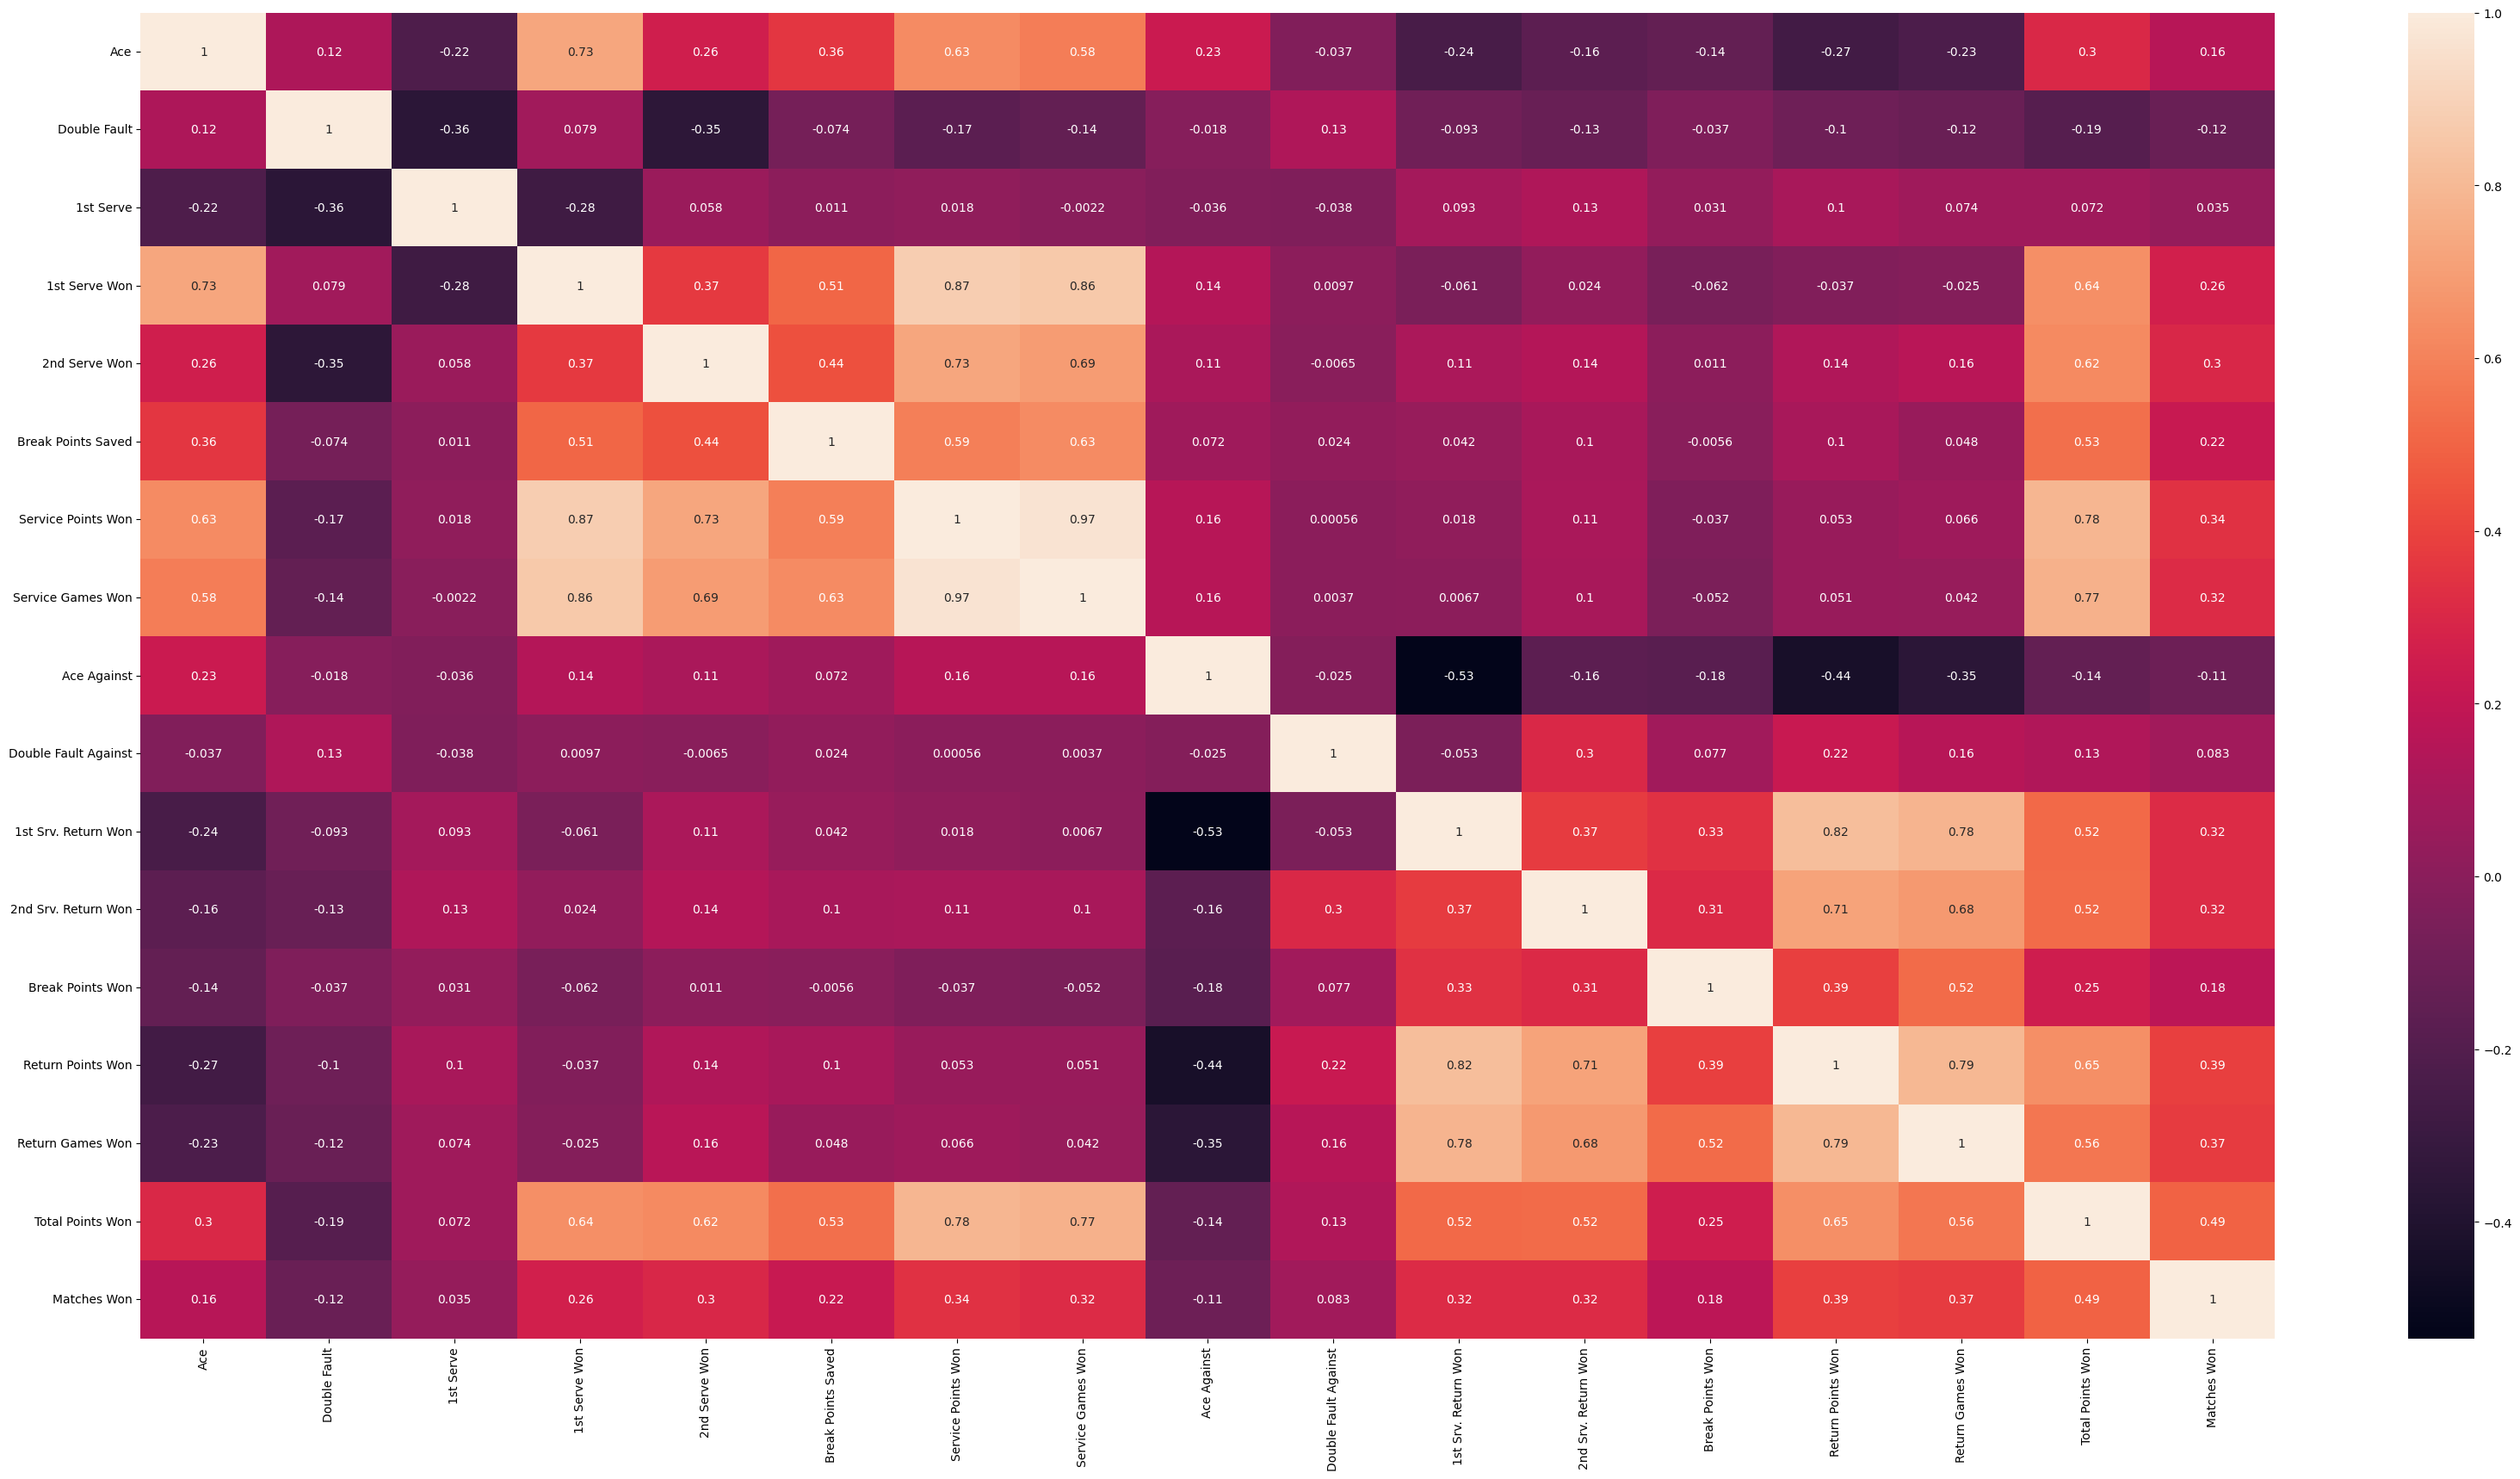

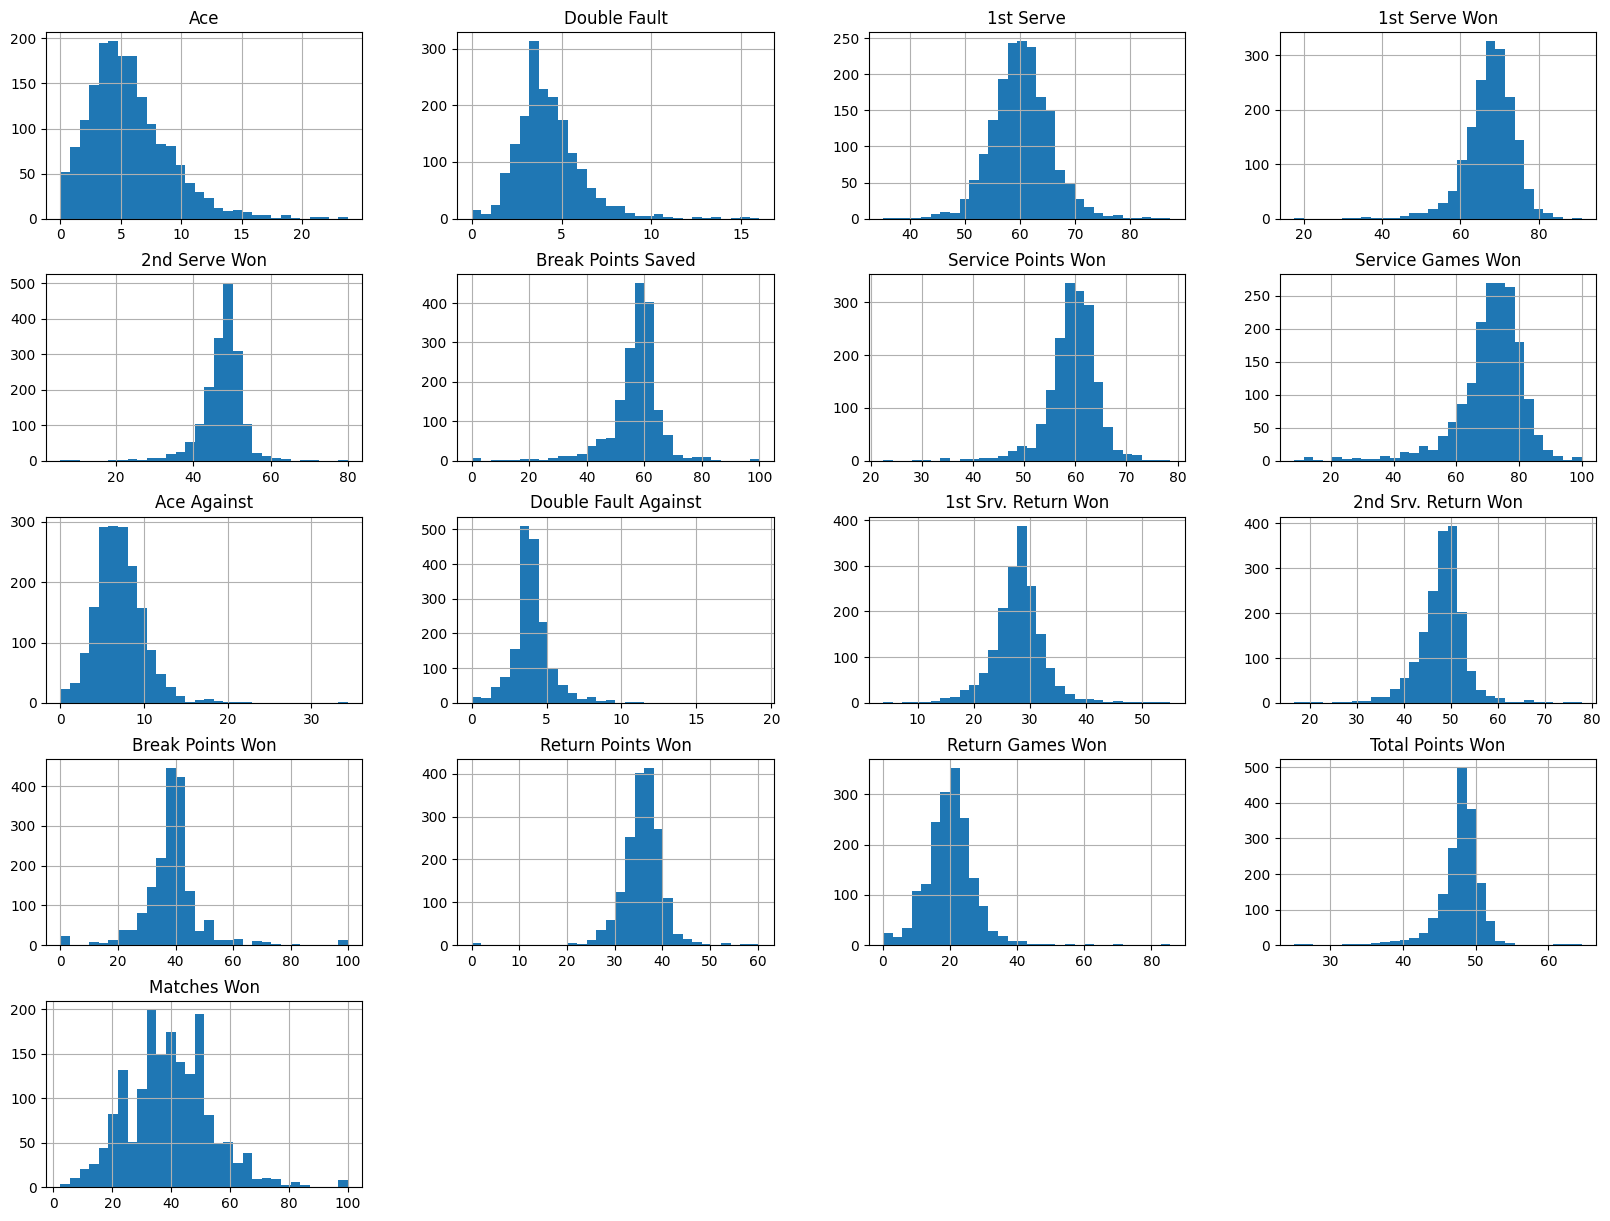

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.gcf().set_size_inches(40,20)
plt.show()

In [ ]:
# Análisis de distribución de variables
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
# Separamos las características (features) de la etiqueta (target)
X = dataset.drop('Matches Won', axis=1)
y = dataset['Matches Won']

# Transformación logarítmica de la variable objetivo
y_log = np.log1p(y)

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape para la CNN y la RNN
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
# Definimos las redes neuronales
def create_dense_model(input_dim, layers, units, dropout_rate):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=input_dim))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_rnn_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(SimpleRNN(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_lstm_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_shape, filters, kernel_size, pool_size, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Parámetros para las redes neuronales
input_dim = X_train_scaled.shape[1]
input_shape_rnn = (X_train_rnn.shape[1], X_train_rnn.shape[2])
dense_layers_list = [2, 3]
units_list = [64, 128]
dropout_rate = 0.2
filters_list = [32, 64]
kernel_size = 3
pool_size = 2

# Evaluamos las redes neuronales
results_nn = {}

In [ ]:
# Redes densas
for layers in dense_layers_list:
    for units in units_list:
        model_name = f"Dense_{layers}_layers_{units}_units"
        print(f"Training model: {model_name}")
        model = create_dense_model(input_dim, layers, units, dropout_rate)
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

        y_test_pred_log = model.predict(X_test_scaled).flatten()
        y_test_pred = np.expm1(y_test_pred_log)
        y_test_pred = np.maximum(0, y_test_pred)
        y_test_actual = np.expm1(y_test)

        test_mse = mean_squared_error(y_test_actual, y_test_pred)
        test_r2 = r2_score(y_test_actual, y_test_pred)
        test_mae = mean_absolute_error(y_test_actual, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        results_nn[model_name] = {
            'Test MSE': test_mse,
            'Test R²': test_r2,
            'Test MAE': test_mae,
            'Test RMSE': test_rmse
        }
        print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: Dense_2_layers_64_units
11/11 [==============================] - 0s 2ms/step
Dense_2_layers_64_units - Test MSE: 162.79, Test R²: 0.12, Test MAE: 8.79, Test RMSE: 12.76
Training model: Dense_2_layers_128_units
11/11 [==============================] - 0s 2ms/step
Dense_2_layers_128_units - Test MSE: 186.91, Test R²: -0.01, Test MAE: 9.08, Test RMSE: 13.67
Training model: Dense_3_layers_64_units
11/11 [==============================] - 0s 3ms/step
Dense_3_layers_64_units - Test MSE: 155.08, Test R²: 0.16, Test MAE: 9.03, Test RMSE: 12.45
Training model: Dense_3_layers_128_units
11/11 [==============================] - 0s 2ms/step
Dense_3_layers_128_units - Test MSE: 152.85, Test R²: 0.17, Test MAE: 8.62, Test RMSE: 12.36


In [ ]:
# RNN
for units in units_list:
    model_name = f"RNN_{units}_units"
    print(f"Training model: {model_name}")
    model = create_rnn_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: RNN_64_units
11/11 [==============================] - 0s 3ms/step
RNN_64_units - Test MSE: 119.93, Test R²: 0.35, Test MAE: 7.72, Test RMSE: 10.95
Training model: RNN_128_units
11/11 [==============================] - 0s 3ms/step
RNN_128_units - Test MSE: 134.30, Test R²: 0.27, Test MAE: 8.56, Test RMSE: 11.59


In [ ]:
# LSTM
for units in units_list:
    model_name = f"LSTM_{units}_units"
    print(f"Training model: {model_name}")
    model = create_lstm_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: LSTM_64_units
11/11 [==============================] - 0s 4ms/step


LSTM_64_units - Test MSE: 128.65, Test R²: 0.31, Test MAE: 8.38, Test RMSE: 11.34
Training model: LSTM_128_units
11/11 [==============================] - 0s 4ms/step
LSTM_128_units - Test MSE: 130.10, Test R²: 0.30, Test MAE: 8.45, Test RMSE: 11.41


In [ ]:
# CNN
for filters in filters_list:
    model_name = f"CNN_{filters}_filters"
    print(f"Training model: {model_name}")
    model = create_cnn_model(input_shape_rnn, filters, kernel_size, pool_size, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: CNN_32_filters
11/11 [==============================] - 0s 8ms/step
CNN_32_filters - Test MSE: 137.10, Test R²: 0.26, Test MAE: 8.50, Test RMSE: 11.71
Training model: CNN_64_filters
11/11 [==============================] - 0s 6ms/step
CNN_64_filters - Test MSE: 139.32, Test R²: 0.25, Test MAE: 8.39, Test RMSE: 11.80


In [ ]:
# Mostramos resultados de las redes neuronales
results_df_nn = pd.DataFrame(results_nn).T
print(results_df_nn)

                            Test MSE   Test R²  Test MAE  Test RMSE
Dense_2_layers_64_units   162.794891  0.120893  8.793053  12.759110
Dense_2_layers_128_units  186.912239 -0.009342  9.078332  13.671585
Dense_3_layers_64_units   155.075683  0.162578  9.032236  12.452939
Dense_3_layers_128_units  152.845120  0.174623  8.624228  12.363055
RNN_64_units              119.929946  0.352368  7.716045  10.951253
RNN_128_units             134.302390  0.274755  8.561842  11.588891
LSTM_64_units             128.645730  0.305302  8.375018  11.342210
LSTM_128_units            130.101427  0.297441  8.454793  11.406201
CNN_32_filters            137.097947  0.259659  8.500852  11.708883
CNN_64_filters            139.318830  0.247666  8.391737  11.803340


## Con modelo binario + regresivo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
# Cargamos dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/tennis_players_historical_and_individual_stats.csv')

# Eliminamos las características 'Sets Won' y 'Games Won'
dataset = dataset.drop(columns=['Sets Won', 'Games Won'])

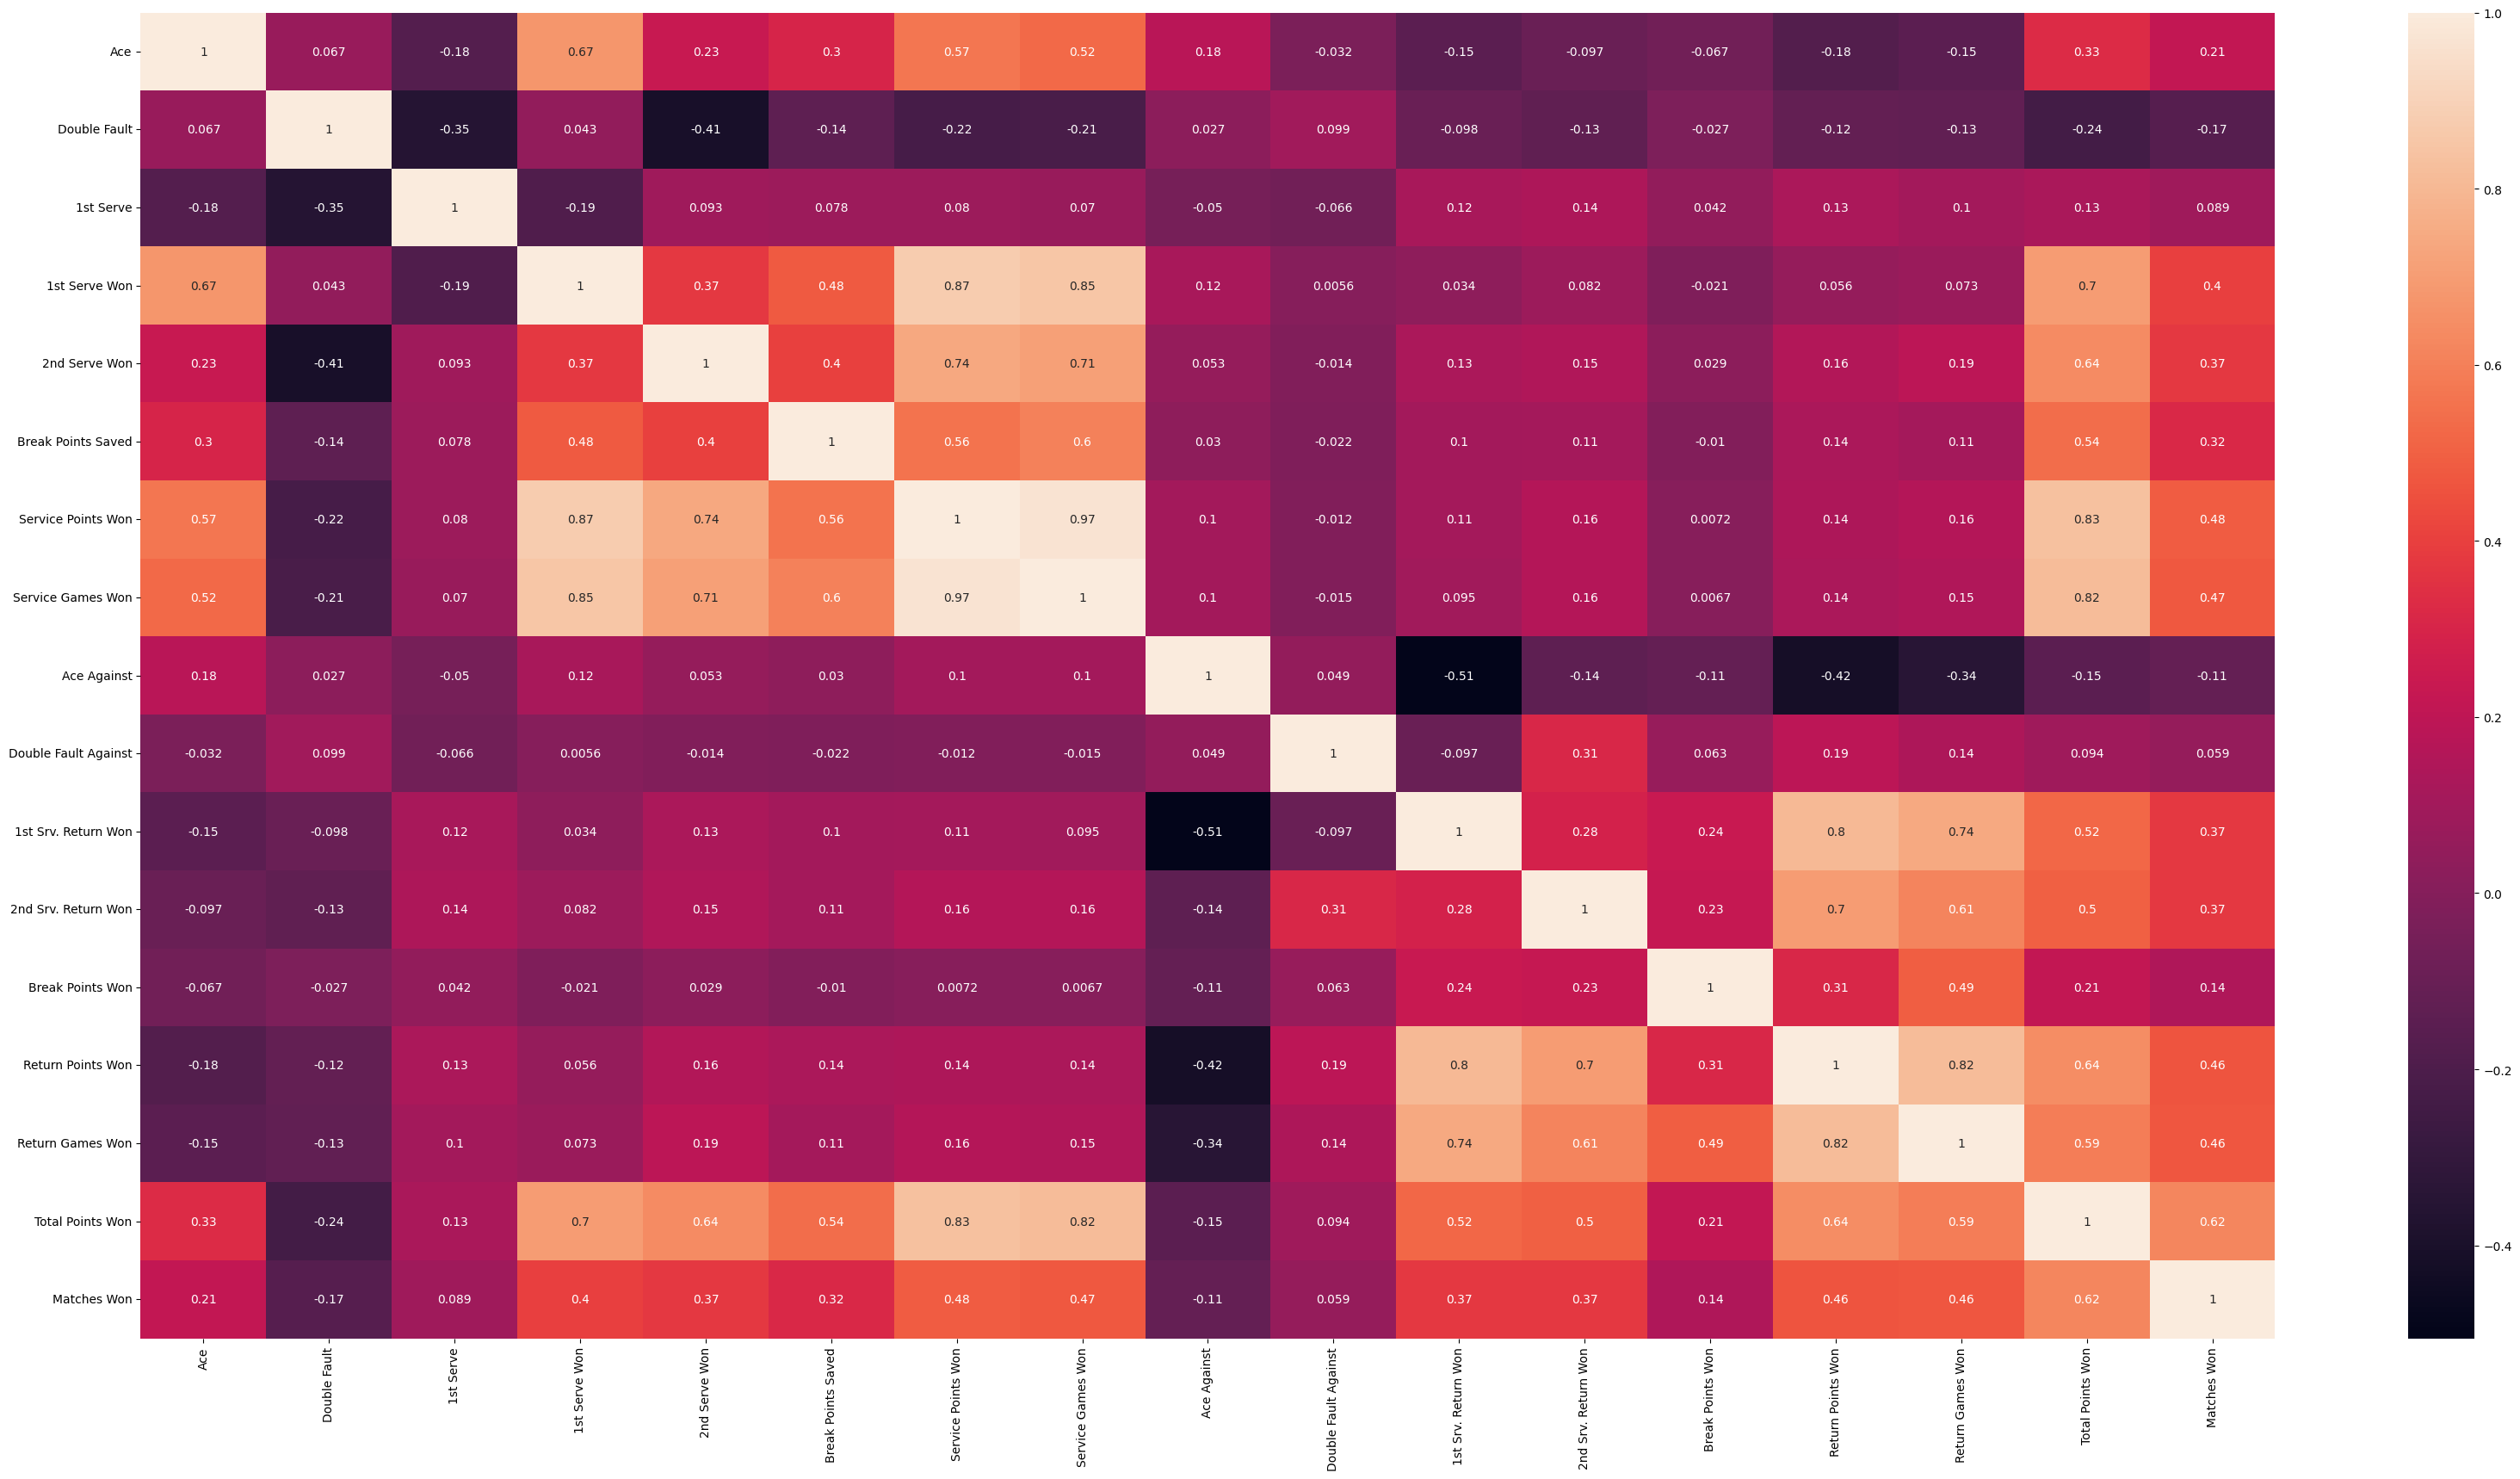

In [ ]:
# Mapa de calor de correlación
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(), annot=True)
plt.gcf().set_size_inches(40,20)
plt.show()

In [ ]:
# Análisis de distribución de variables
dataset.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
# Creamos variable binaria para predecir si un jugador ha ganado algún partido
dataset['Won_Match'] = dataset['Matches Won'] > 0

# Separamos las características (features) de la etiqueta binaria (target binario)
X_binary = dataset.drop(['Matches Won', 'Won_Match'], axis=1)
y_binary = dataset['Won_Match']

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) para modelo binario
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)

In [ ]:
# Definimos las redes neuronales para el modelo binario
def create_binary_model(input_dim, layers, units, dropout_rate):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=input_dim))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Parámetros para las redes neuronales binarias
binary_layers_list = [2, 3]
binary_units_list = [64, 128]
dropout_rate = 0.2

# Evaluamos las redes neuronales binarias
results_binary_nn = {}

In [ ]:
# Redes densas binarias
for layers in binary_layers_list:
    for units in binary_units_list:
        model_name = f"Binary_Dense_{layers}_layers_{units}_units"
        print(f"Training binary model: {model_name}")
        model = create_binary_model(X_train_bin_scaled.shape[1], layers, units, dropout_rate)
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(X_train_bin_scaled, y_train_bin, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

        y_test_bin_pred = model.predict(X_test_bin_scaled).flatten()
        y_test_bin_pred = (y_test_bin_pred > 0.5).astype(int)

        binary_accuracy = accuracy_score(y_test_bin, y_test_bin_pred)

        results_binary_nn[model_name] = {
            'Accuracy': binary_accuracy
        }
        print(f"{model_name} - Accuracy: {binary_accuracy:.2f}")

Training binary model: Binary_Dense_2_layers_64_units
15/15 [==============================] - 0s 2ms/step
Binary_Dense_2_layers_64_units - Accuracy: 0.87
Training binary model: Binary_Dense_2_layers_128_units
15/15 [==============================] - 0s 2ms/step
Binary_Dense_2_layers_128_units - Accuracy: 0.87
Training binary model: Binary_Dense_3_layers_64_units
15/15 [==============================] - 0s 2ms/step
Binary_Dense_3_layers_64_units - Accuracy: 0.87
Training binary model: Binary_Dense_3_layers_128_units
15/15 [==============================] - 0s 2ms/step
Binary_Dense_3_layers_128_units - Accuracy: 0.87


In [ ]:
# Mostramos resultados de las redes neuronales binarias
results_df_binary_nn = pd.DataFrame(results_binary_nn).T
print(results_df_binary_nn)

                                 Accuracy
Binary_Dense_2_layers_64_units   0.870330
Binary_Dense_2_layers_128_units  0.872527
Binary_Dense_3_layers_64_units   0.870330
Binary_Dense_3_layers_128_units  0.874725


In [ ]:
# Seleccionamos el mejor modelo binario basado en la mayor accuracy
best_binary_model_name = results_df_binary_nn['Accuracy'].idxmax()
best_binary_model = create_binary_model(X_train_bin_scaled.shape[1], int(best_binary_model_name.split('_')[2]), int(best_binary_model_name.split('_')[4]), dropout_rate)
best_binary_model.fit(X_train_bin_scaled, y_train_bin, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

In [ ]:
# Predicción del mejor modelo binario en el conjunto de prueba
y_test_bin_pred = best_binary_model.predict(X_test_bin_scaled).flatten()
y_test_bin_pred = (y_test_bin_pred > 0.5).astype(int)

# Evaluamos el mejor modelo binario
binary_accuracy = accuracy_score(y_test_bin, y_test_bin_pred)
print(f"Best Binary Model Test Accuracy: {binary_accuracy:.2f}")
print(confusion_matrix(y_test_bin, y_test_bin_pred))

15/15 [==============================] - 0s 2ms/step
Best Binary Model Test Accuracy: 0.86
[[ 68  36]
 [ 26 325]]


In [ ]:
# Predecimos en todo el dataset para obtener las predicciones binarias
y_pred_bin_all = best_binary_model.predict(scaler_bin.transform(X_binary)).flatten()
y_pred_bin_all = (y_pred_bin_all > 0.5).astype(int)

72/72 [==============================] - 0s 2ms/step


In [ ]:
# Filtramos los jugadores que se predice que ganarán al menos un partido
X_regression = X_binary[y_pred_bin_all == 1]
y_regression = dataset[y_pred_bin_all == 1]['Matches Won']

# Transformación logarítmica de la variable objetivo
y_regression_log = np.log1p(y_regression)

# Dividimos el dataset en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) para modelo de regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression_log, test_size=0.2, random_state=42)

# Normalizamos los datos
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Reshape para la CNN y la RNN
X_train_rnn = X_train_reg_scaled.reshape((X_train_reg_scaled.shape[0], X_train_reg_scaled.shape[1], 1))
X_test_rnn = X_test_reg_scaled.reshape((X_test_reg_scaled.shape[0], X_test_reg_scaled.shape[1], 1))

In [ ]:
# Definimos las redes neuronales para el modelo de regresión
def create_dense_model(input_dim, layers, units, dropout_rate):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=input_dim))
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_rnn_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(SimpleRNN(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_lstm_model(input_shape, units, dropout_rate):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_shape, filters, kernel_size, pool_size, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
# Parámetros para las redes neuronales
input_dim = X_train_reg_scaled.shape[1]
input_shape_rnn = (X_train_rnn.shape[1], X_train_rnn.shape[2])
dense_layers_list = [2, 3]
units_list = [64, 128]
filters_list = [32, 64]
kernel_size = 3
pool_size = 2
dropout_rate = 0.2

# Evaluamos las redes neuronales
results_nn = {}

In [ ]:
# Redes densas
for layers in dense_layers_list:
    for units in units_list:
        model_name = f"Dense_{layers}_layers_{units}_units"
        print(f"Training model: {model_name}")
        model = create_dense_model(input_dim, layers, units, dropout_rate)
        early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
        history = model.fit(X_train_reg_scaled, y_train_reg, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

        y_test_pred_log = model.predict(X_test_reg_scaled).flatten()
        y_test_pred = np.expm1(y_test_pred_log)
        y_test_pred = np.maximum(0, y_test_pred)
        y_test_actual = np.expm1(y_test_reg)

        test_mse = mean_squared_error(y_test_actual, y_test_pred)
        test_r2 = r2_score(y_test_actual, y_test_pred)
        test_mae = mean_absolute_error(y_test_actual, y_test_pred)
        test_rmse = np.sqrt(test_mse)

        results_nn[model_name] = {
            'Test MSE': test_mse,
            'Test R²': test_r2,
            'Test MAE': test_mae,
            'Test RMSE': test_rmse
        }
        print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: Dense_2_layers_64_units
11/11 [==============================] - 0s 2ms/step
Dense_2_layers_64_units - Test MSE: 256.13, Test R²: 0.19, Test MAE: 12.43, Test RMSE: 16.00
Training model: Dense_2_layers_128_units
11/11 [==============================] - 0s 3ms/step
Dense_2_layers_128_units - Test MSE: 327.28, Test R²: -0.04, Test MAE: 12.05, Test RMSE: 18.09
Training model: Dense_3_layers_64_units
11/11 [==============================] - 0s 2ms/step
Dense_3_layers_64_units - Test MSE: 238.59, Test R²: 0.24, Test MAE: 11.27, Test RMSE: 15.45
Training model: Dense_3_layers_128_units
11/11 [==============================] - 0s 3ms/step
Dense_3_layers_128_units - Test MSE: 269.85, Test R²: 0.14, Test MAE: 12.78, Test RMSE: 16.43


In [ ]:
# RNN
for units in units_list:
    model_name = f"RNN_{units}_units"
    print(f"Training model: {model_name}")
    model = create_rnn_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train_reg, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test_reg)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: RNN_64_units
11/11 [==============================] - 0s 3ms/step
RNN_64_units - Test MSE: 261.10, Test R²: 0.17, Test MAE: 12.43, Test RMSE: 16.16
Training model: RNN_128_units
11/11 [==============================] - 0s 3ms/step
RNN_128_units - Test MSE: 202.08, Test R²: 0.36, Test MAE: 10.30, Test RMSE: 14.22


In [ ]:
# LSTM
for units in units_list:
    model_name = f"LSTM_{units}_units"
    print(f"Training model: {model_name}")
    model = create_lstm_model(input_shape_rnn, units, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train_reg, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test_reg)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: LSTM_64_units
11/11 [==============================] - 0s 4ms/step


LSTM_64_units - Test MSE: 213.37, Test R²: 0.32, Test MAE: 10.38, Test RMSE: 14.61
Training model: LSTM_128_units
11/11 [==============================] - 0s 6ms/step
LSTM_128_units - Test MSE: 200.83, Test R²: 0.36, Test MAE: 9.96, Test RMSE: 14.17


In [ ]:
# CNN
for filters in filters_list:
    model_name = f"CNN_{filters}_filters"
    print(f"Training model: {model_name}")
    model = create_cnn_model(input_shape_rnn, filters, kernel_size, pool_size, dropout_rate)
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train_rnn, y_train_reg, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

    y_test_pred_log = model.predict(X_test_rnn).flatten()
    y_test_pred = np.expm1(y_test_pred_log)
    y_test_pred = np.maximum(0, y_test_pred)
    y_test_actual = np.expm1(y_test_reg)

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    results_nn[model_name] = {
        'Test MSE': test_mse,
        'Test R²': test_r2,
        'Test MAE': test_mae,
        'Test RMSE': test_rmse
    }
    print(f"{model_name} - Test MSE: {test_mse:.2f}, Test R²: {test_r2:.2f}, Test MAE: {test_mae:.2f}, Test RMSE: {test_rmse:.2f}")

Training model: CNN_32_filters
11/11 [==============================] - 0s 2ms/step
CNN_32_filters - Test MSE: 220.02, Test R²: 0.30, Test MAE: 11.14, Test RMSE: 14.83
Training model: CNN_64_filters
11/11 [==============================] - 0s 2ms/step
CNN_64_filters - Test MSE: 218.02, Test R²: 0.31, Test MAE: 10.06, Test RMSE: 14.77


In [ ]:
# Mostramos resultados de las redes neuronales
results_df_nn = pd.DataFrame(results_nn).T
print(results_df_nn)

                            Test MSE   Test R²   Test MAE  Test RMSE
Dense_2_layers_64_units   256.127944  0.187446  12.433929  16.003998
Dense_2_layers_128_units  327.281818 -0.038286  12.045324  18.090932
Dense_3_layers_64_units   238.587140  0.243093  11.271206  15.446266
Dense_3_layers_128_units  269.845631  0.143927  12.777349  16.426979
RNN_64_units              261.098816  0.171676  12.432233  16.158552
RNN_128_units             202.076208  0.358923  10.295006  14.215351
LSTM_64_units             213.372961  0.323084  10.375865  14.607291
LSTM_128_units            200.830080  0.362876   9.957922  14.171453
CNN_32_filters            220.017101  0.302006  11.139480  14.832973
CNN_64_filters            218.017034  0.308351  10.062389  14.765400
